# H-1B Visa Petition
## 01:EDA

**Author:** Prasoon Karmacharya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("../assets/data/893_1632_bundle_archive.zip")

In [3]:
#Settings and Helper Functions
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def thousand(x, pos):
    return '%1.0f' % (x*1e-3)

num_formatter = FuncFormatter(thousand)

def USD_thousand(x, pos):
    return '$%1.0fK' % (x*1e-3)
USD_formatter = FuncFormatter(USD_thousand)


In [4]:
df.head()

Unnamed: 0          CASE_STATUS                                      EMPLOYER_NAME                       SOC_NAME                     JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE         lon        lat
0           1  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN  -83.743038  42.280826
1           2  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER                  Y         242674.0  2016.0             PLANO, TEXAS  -96.698886  33.019843
2           3  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY  -74.077642  40.728158
3           4  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS                  Y         220314.0  2016.0         DENVER, COLORADO -104.990251  39.739236
4           5            WITHDRAWN                          PEABODY INVESTMENTS CORP.               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI  -90.199404  38.627003

In [5]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
df.shape

(3002458, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                float64
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(4), object(6)
memory usage: 229.1+ MB


### Horizontal Bar chart function

In [8]:
def plot_hbar(df, title_text, xlabel_text, top_n, color_primary= "#133337", width=0.65, x_type="count"):
    ax = df[:top_n].plot(kind="barh", figsize=(20,20), legend=None, color=color_primary, edgecolor=color_primary, width=width)
    ax.set_title(title_text, fontsize=48, color=color_primary)
    ax.set_xlabel(xlabel_text, fontsize=40, color=color_primary);
    ax.tick_params(axis="both", which="major", labelsize=30);
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if x_type == "count":
        ax.xaxis.set_major_formatter(num_formatter)
    elif x_type == "currency":
        ax.xaxis.set_major_formatter(USD_formatter)
    else:
        pass
    ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)
    ax.invert_yaxis()

### Top H-1B Sponsors

In [9]:
top_sponsors = pd.DataFrame(df["EMPLOYER_NAME"].value_counts())
top_sponsors.columns = ["H1B_Count"]

In [10]:
top_sponsors.head(5)

H1B_Count
INFOSYS LIMITED                       130592
TATA CONSULTANCY SERVICES LIMITED      64726
WIPRO LIMITED                          48117
DELOITTE CONSULTING LLP                36742
IBM INDIA PRIVATE LIMITED              34219

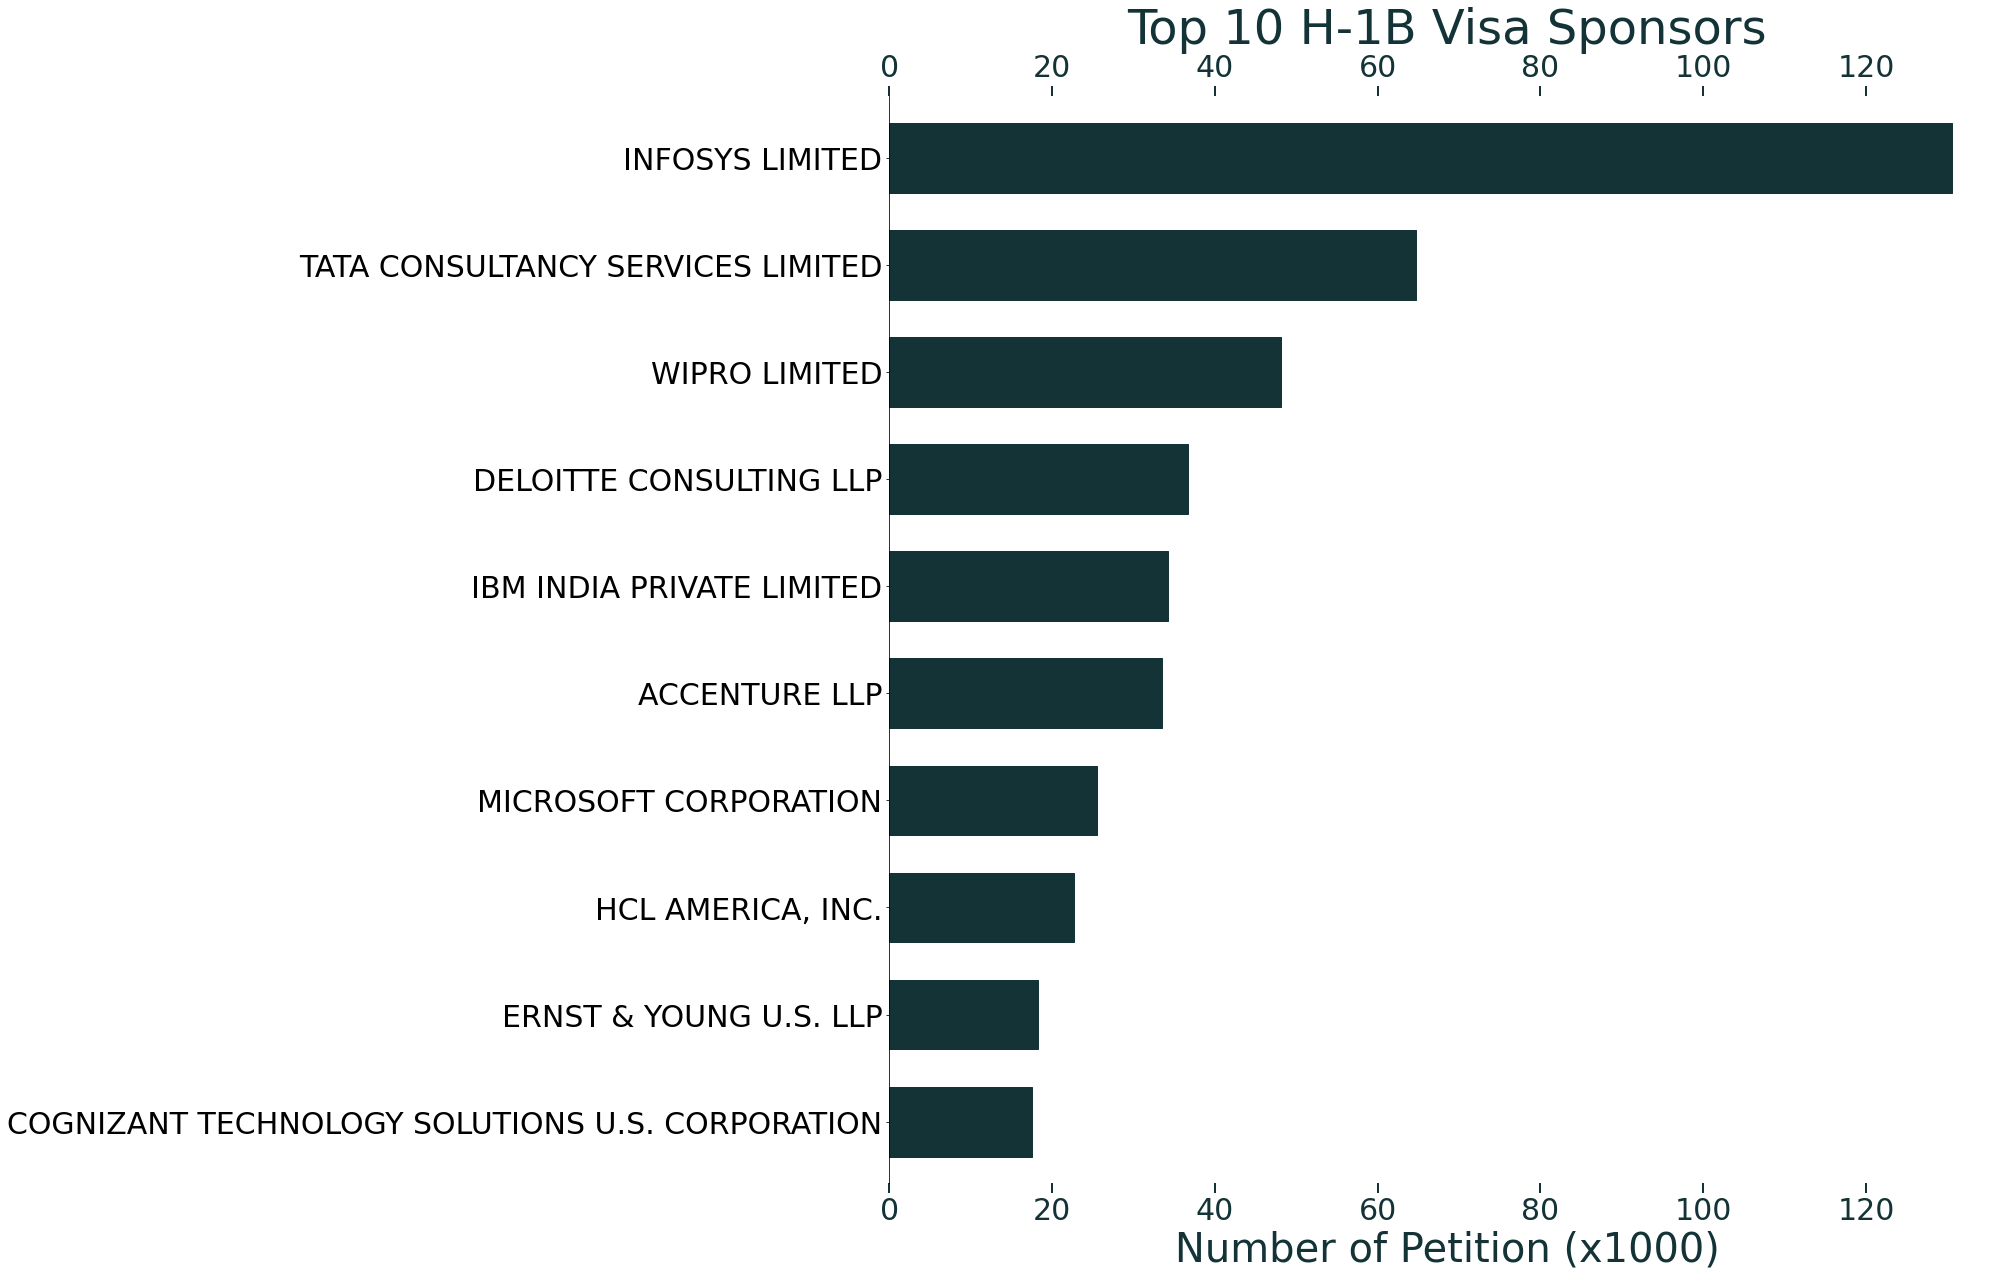

In [11]:
plot_hbar(df=top_sponsors,
          top_n=10,
          title_text = f"Top 10 H-1B Visa Sponsors",
          xlabel_text = "Number of Petition (x1000)",          
          color_primary =  "#133337",
          x_type="count")

### Top H-1B Job Title

In [12]:
top_job_title = pd.DataFrame(df["JOB_TITLE"].value_counts())
top_job_title.columns = ["Job Title"]

In [13]:
top_job_title.head(5)

Job Title
PROGRAMMER ANALYST      249038
SOFTWARE ENGINEER       121307
COMPUTER PROGRAMMER      70570
SYSTEMS ANALYST          61965
SOFTWARE DEVELOPER       42907

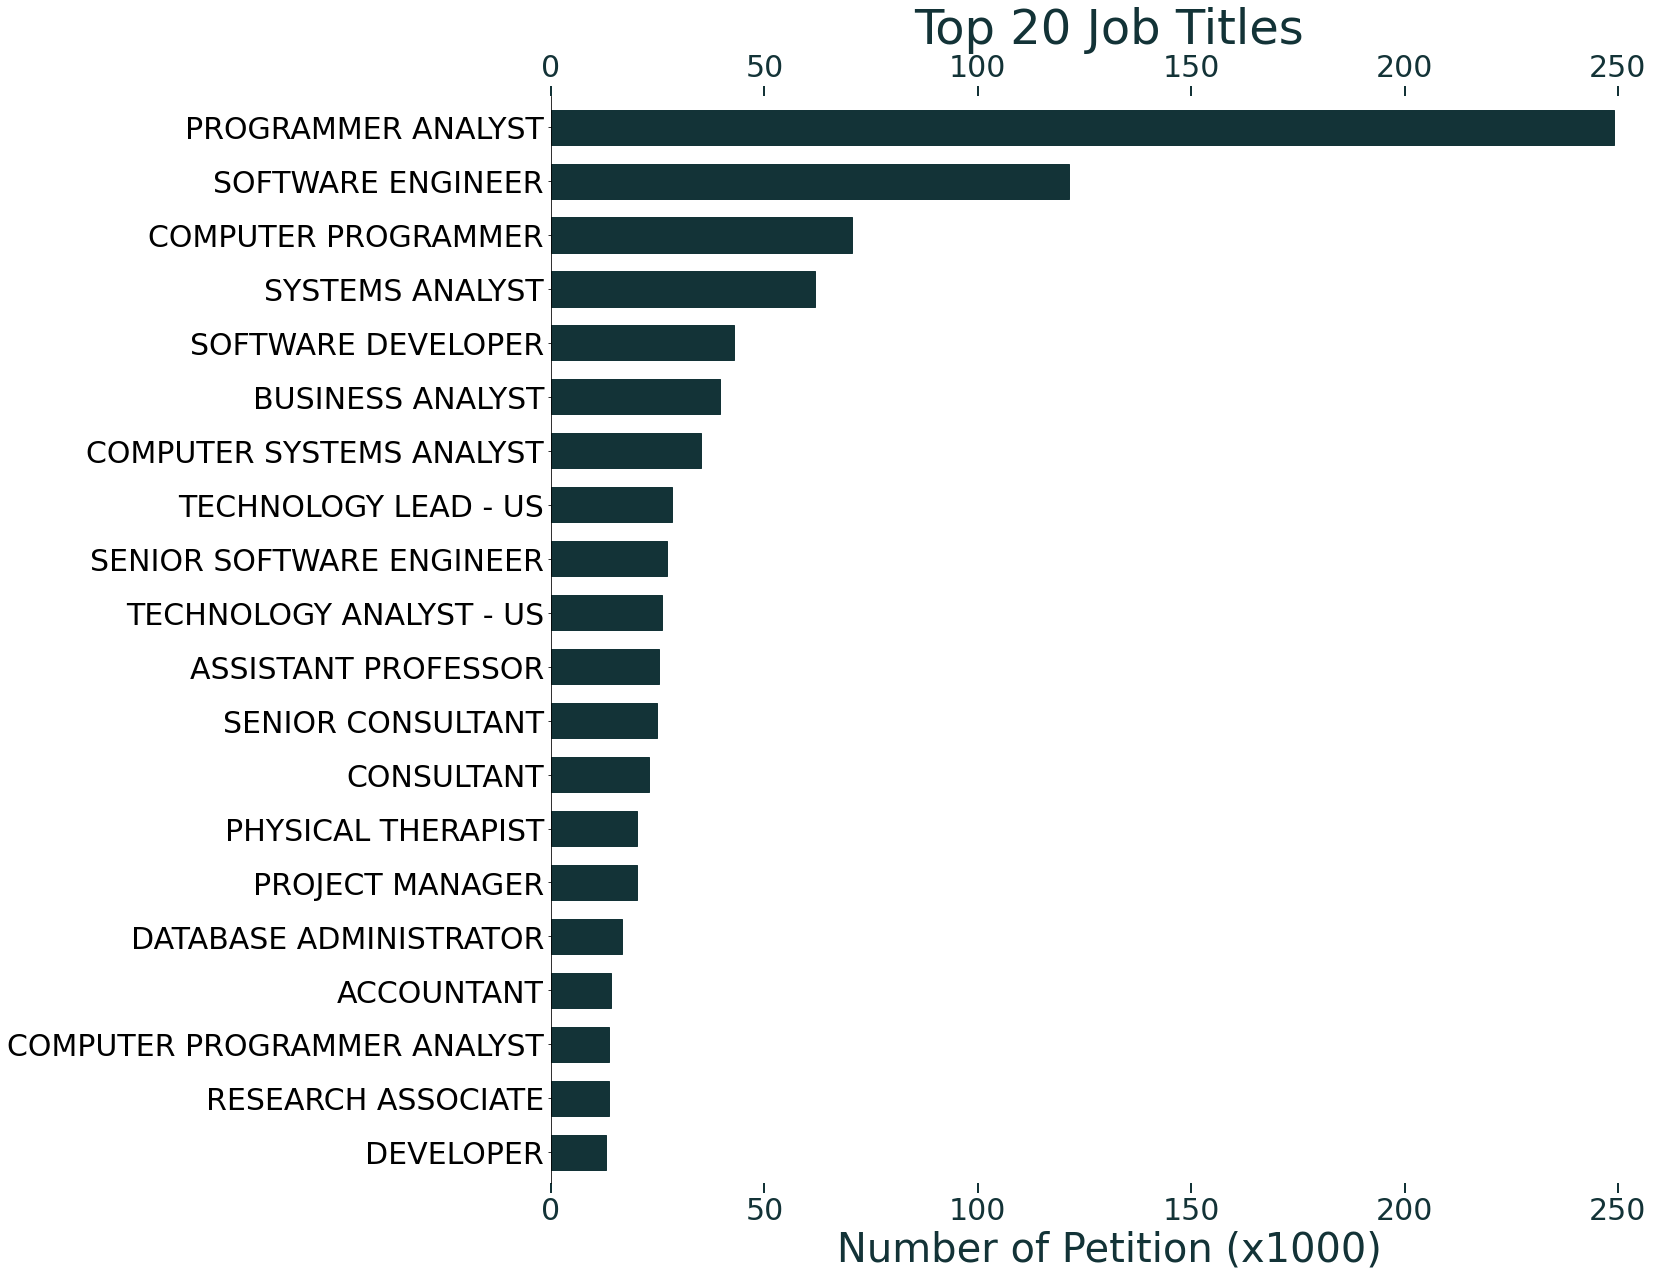

In [14]:
plot_hbar(df=top_job_title, 
          title_text = f"Top 20 Job Titles",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Yearly Petition Count

In [15]:
yearly_count = pd.DataFrame(df["YEAR"].value_counts())
yearly_count.columns = ["Petition Count"]

In [16]:
yearly_count.head()

Petition Count
2016.0          647803
2015.0          618727
2014.0          519427
2013.0          442114
2012.0          415607

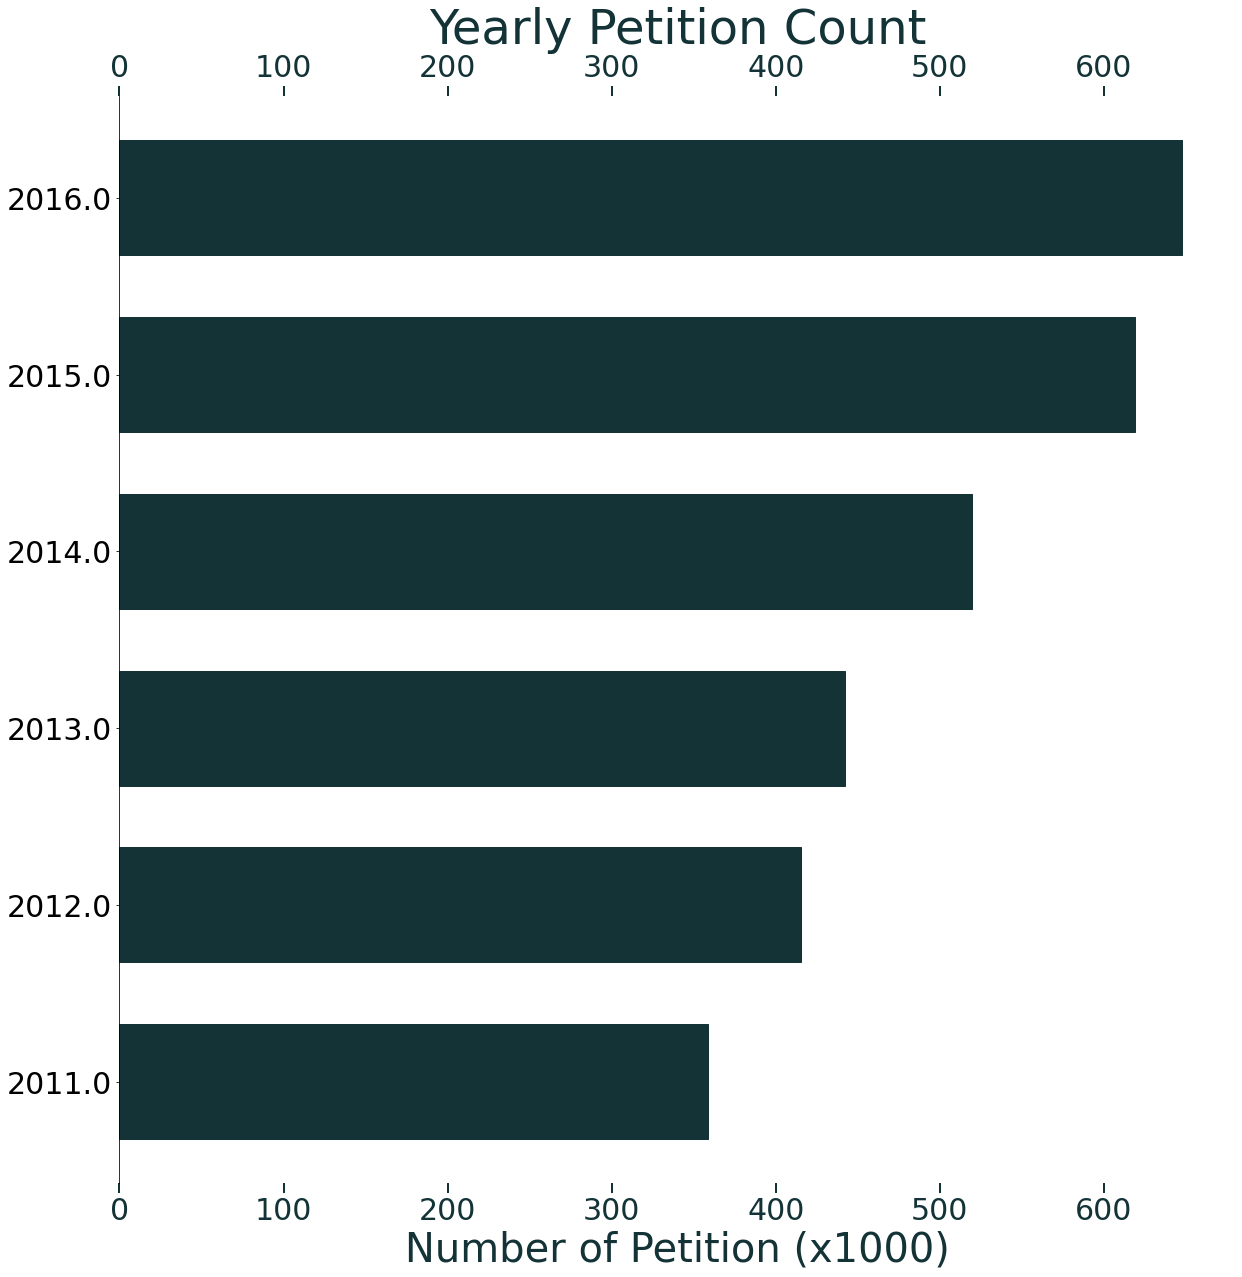

In [17]:
plot_hbar(df=yearly_count, 
          title_text = f"Yearly Petition Count",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Worksite 

In [18]:
worksite = pd.DataFrame(df["WORKSITE"].value_counts())
worksite.columns = ["petition_count"]

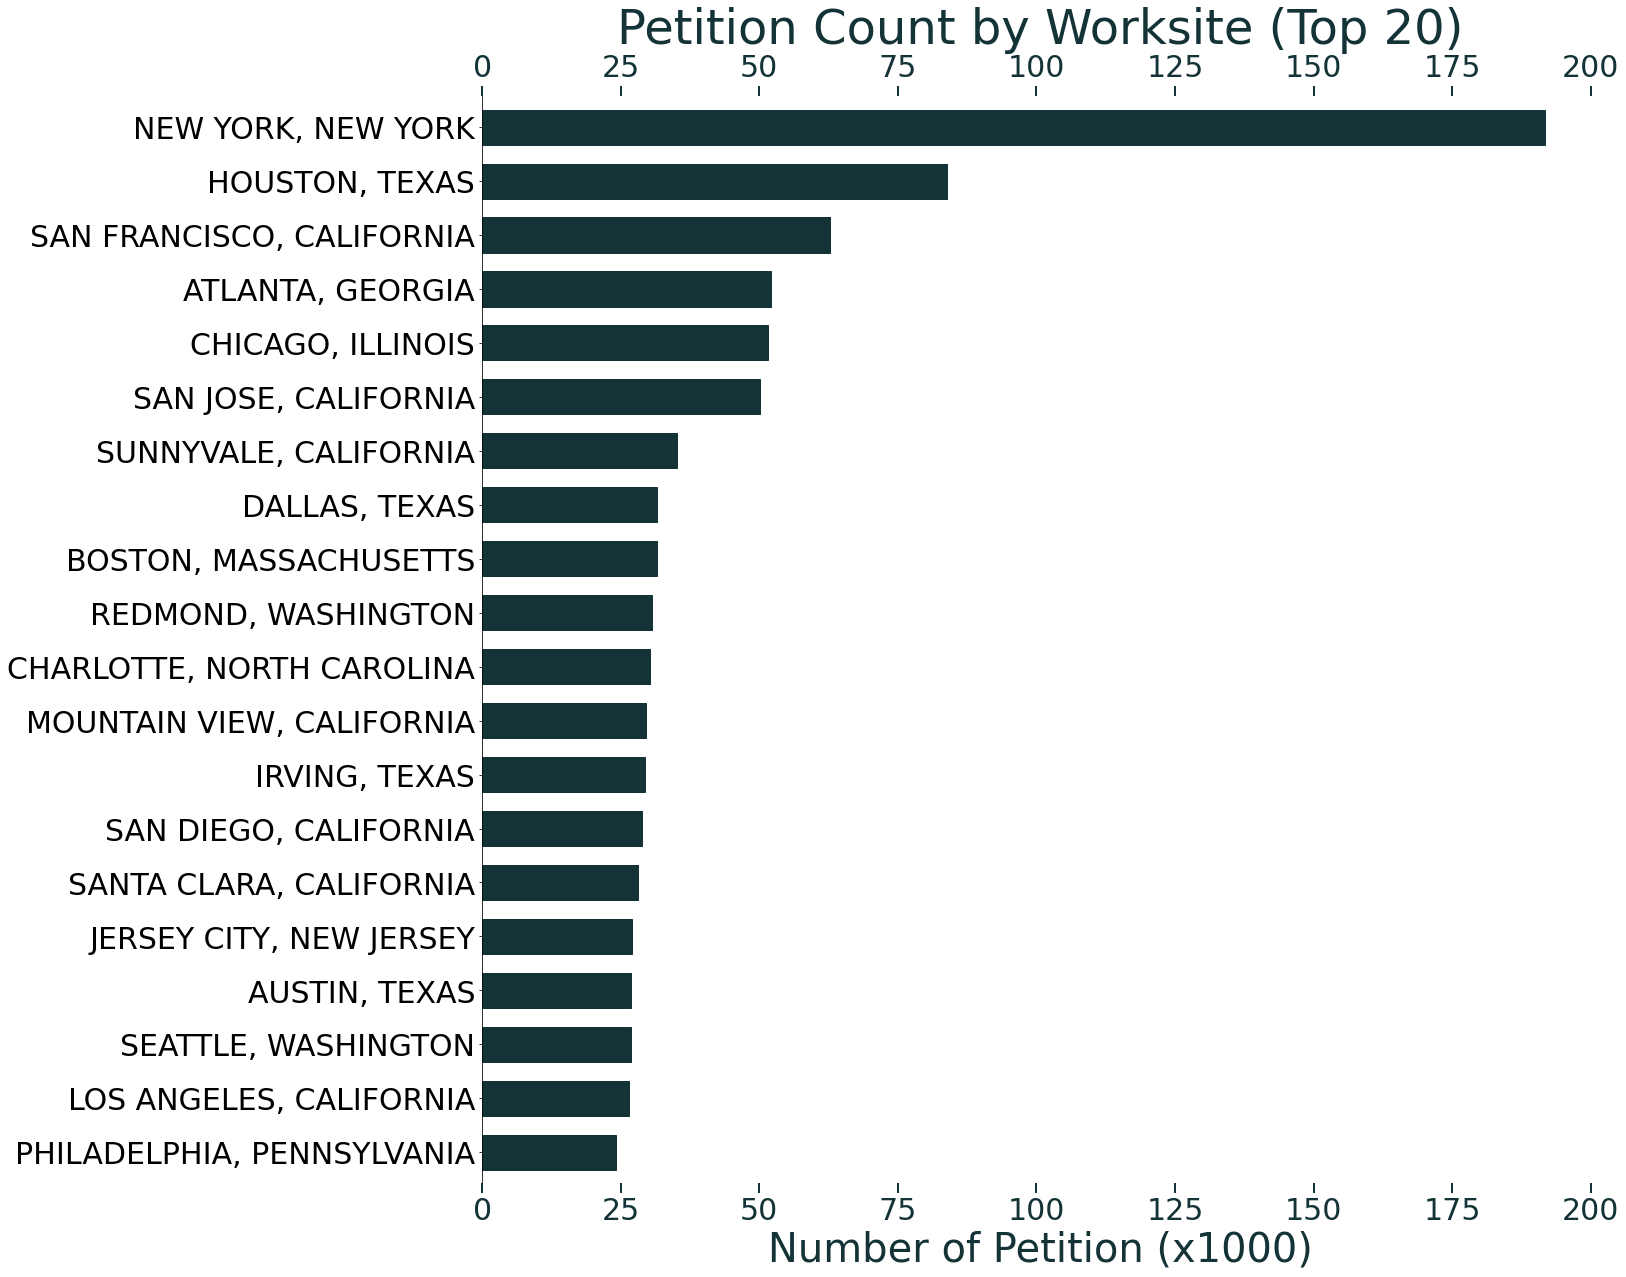

In [19]:
plot_hbar(df=worksite, 
          title_text = f"Petition Count by Worksite (Top 20)",
          xlabel_text = "Number of Petition (x1000)",
          top_n=20,
          color_primary =  "#133337",
          x_type="count")

### Mean Prevailing Wages by Worksite

In [20]:
prevailing_wages = df.groupby("WORKSITE").agg({"PREVAILING_WAGE":"mean"}).sort_values(by=["PREVAILING_WAGE"], ascending=False)


In [21]:
prevailing_wages.head()

PREVAILING_WAGE
WORKSITE                                
WASHINGTON, NA              6.579000e+08
SOMERSET, NEW YORK          1.263309e+08
PEKIN, ILLINOIS             9.095134e+07
CITY, CALIFORNIA            7.280000e+07
MOUNTAIN VIEW, ILLINOIS     7.008897e+07

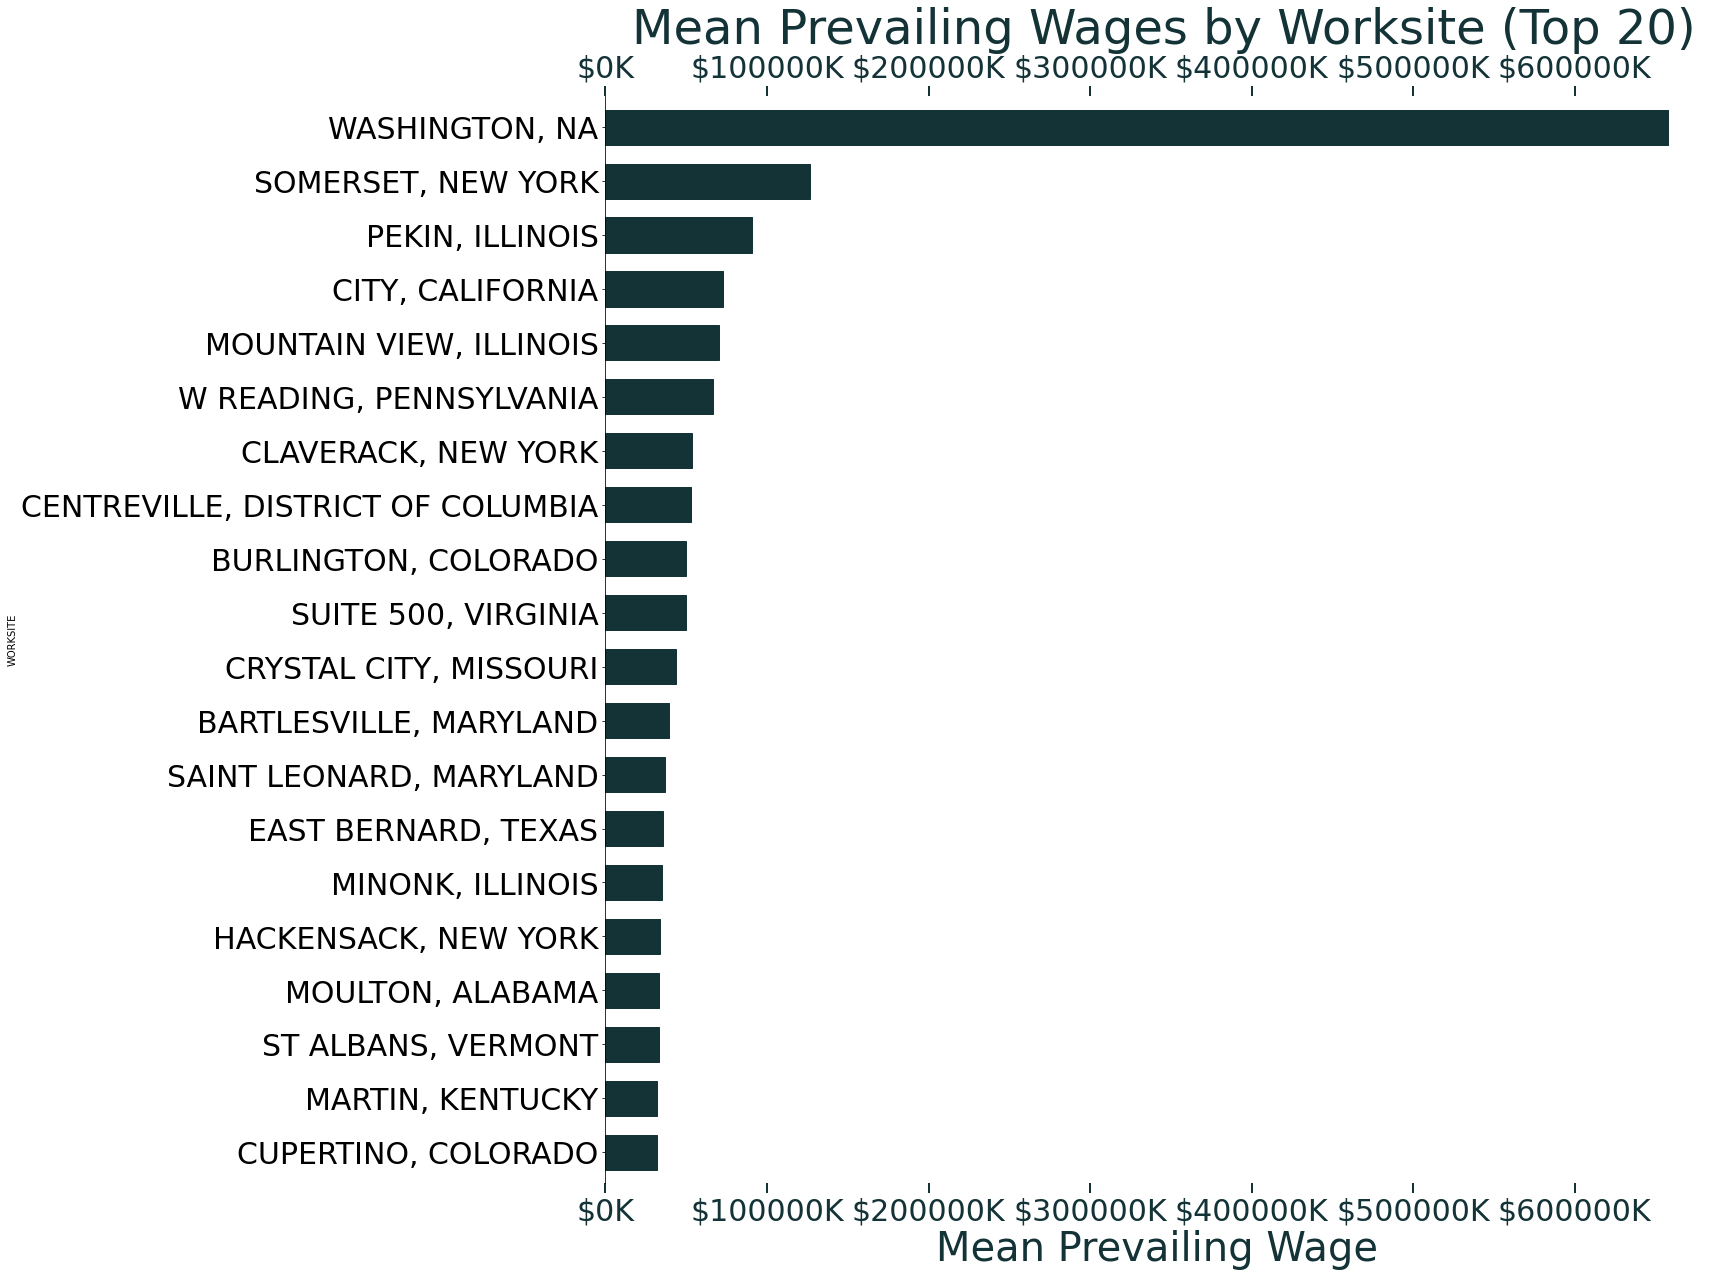

In [22]:
plot_hbar(df=prevailing_wages, 
          title_text = f"Mean Prevailing Wages by Worksite (Top 20)",
          xlabel_text = "Mean Prevailing Wage ",
          top_n=20,
          color_primary =  "#133337",
          x_type="currency")

### Median Prevailing Wages by Worksite

In [23]:
df[df["WORKSITE"] == "WASHINGTON, NA"]

CASE_STATUS        EMPLOYER_NAME                              SOC_NAME                            JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR        WORKSITE  lon  lat
2775906      DENIED  COMMONHEALTH ACTION  Medical and Health Services Managers  PROGRAM MANAGER (POSITIVE PATHWAYS)                  Y      657900000.0  2011.0  WASHINGTON, NA  NaN  NaN

In [24]:
df[df["WORKSITE"] == "SOMERSET, NEW YORK"]

CASE_STATUS             EMPLOYER_NAME                   SOC_NAME           JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR            WORKSITE  lon  lat
1909257      DENIED  RADUS TEK SERVICES INC.,  Computer Systems Analysts  PROGRAMMER ANALYST                  Y      126330880.0  2013.0  SOMERSET, NEW YORK  NaN  NaN

In [25]:
df[df["WORKSITE"] == "CITY, CALIFORNIA"]

CASE_STATUS EMPLOYER_NAME                         SOC_NAME           JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR          WORKSITE  lon  lat
1701      DENIED          GVHB  GENERAL AND OPERATIONS MANAGERS  PROPOSED JOB TITLE                  Y       72800000.0  2016.0  CITY, CALIFORNIA  NaN  NaN

In [26]:
df[df["WORKSITE"] == "CLAVERACK, NEW YORK"]

CASE_STATUS                EMPLOYER_NAME                           SOC_NAME           JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR             WORKSITE  lon  lat
2021913      DENIED  WONBUDDHISM OF U.S.A., INC.  Software Developers, Applications  SOFTWARE DEVELOPER                  Y      107554720.0  2013.0  CLAVERACK, NEW YORK  NaN  NaN
2040977   CERTIFIED  WONBUDDHISM OF U.S.A., INC.  Software Developers, Applications  SOFTWARE DEVELOPER                  Y          51709.0  2013.0  CLAVERACK, NEW YORK  NaN  NaN

In [27]:
df.drop(df[df.index == 2775906].index, inplace = True)
df.drop(df[df.index == 1909257].index, inplace = True)
df.drop(df[df.index == 1701].index, inplace = True)
df.drop(df[df.index == 2021913].index, inplace = True)

In [28]:
prevailing_wages = df.groupby("WORKSITE").agg({"PREVAILING_WAGE":"median"}).sort_values(by=["PREVAILING_WAGE"], ascending=False)


In [29]:
prevailing_wages.head()

PREVAILING_WAGE
WORKSITE                                          
CENTREVILLE, DISTRICT OF COLUMBIA       53262154.5
SAINT LEONARD, MARYLAND                 36782715.5
MINONK, ILLINOIS                        34757902.5
HACKENSACK, NEW YORK                    33730122.5
HARLINGEN CISD, TEXAS                    3012624.0

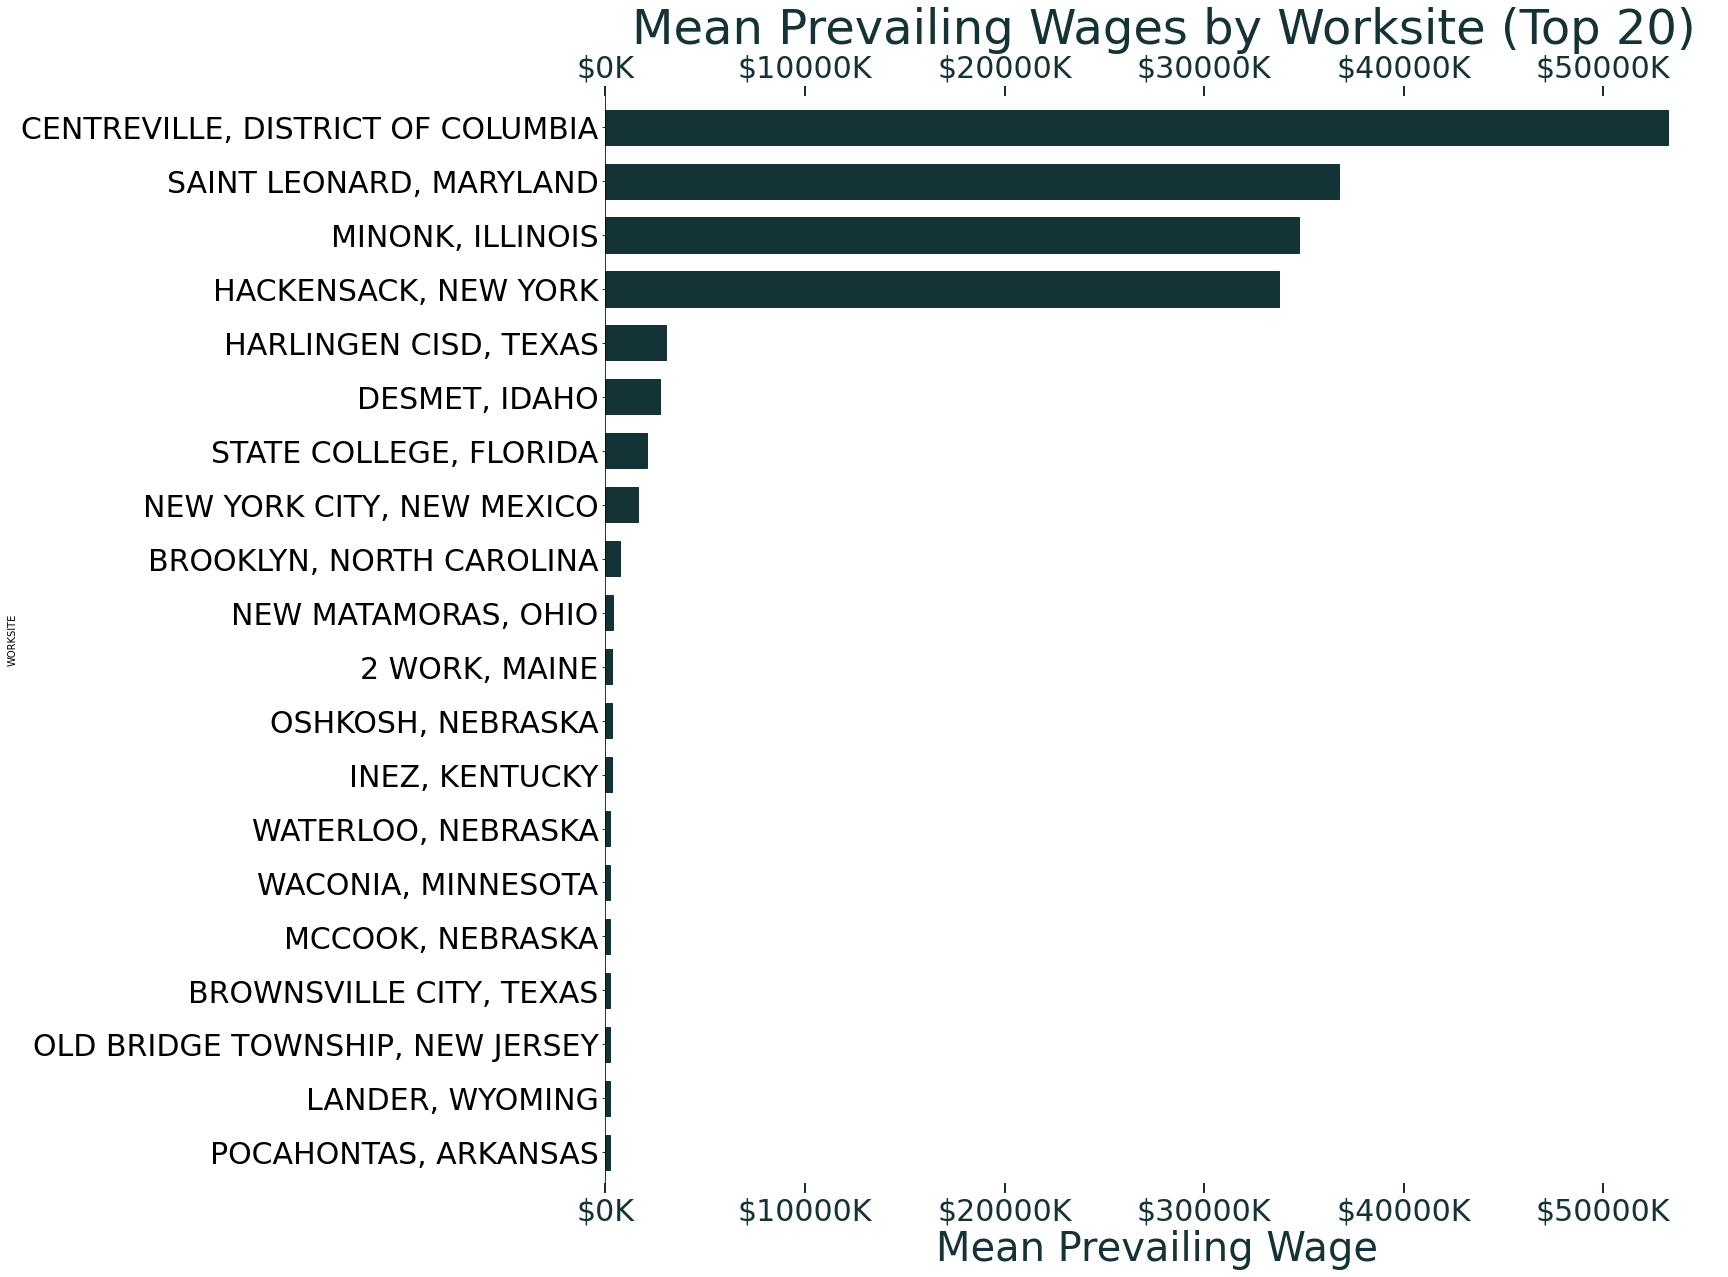

In [30]:
plot_hbar(df=prevailing_wages, 
          title_text = f"Mean Prevailing Wages by Worksite (Top 20)",
          xlabel_text = "Mean Prevailing Wage ",
          top_n=20,
          color_primary =  "#133337",
          x_type="currency")

In [31]:
df[df["WORKSITE"] == "CENTREVILLE, DISTRICT OF COLUMBIA"]

CASE_STATUS                    EMPLOYER_NAME                               SOC_NAME                  JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                           WORKSITE  lon  lat
2171049      DENIED  INSTITUTE FOR GLOBAL ENGAGEMENT  Social and Community Service Managers  EAST ASIA PROGRAM OFFICER                  Y      106473120.0  2013.0  CENTREVILLE, DISTRICT OF COLUMBIA  NaN  NaN
2178057   CERTIFIED  INSTITUTE FOR GLOBAL ENGAGEMENT  Social and Community Service Managers  EAST ASIA PROGRAM OFFICER                  Y          51189.0  2013.0  CENTREVILLE, DISTRICT OF COLUMBIA  NaN  NaN

In [32]:
df[df["WORKSITE"] == "SAINT LEONARD, MARYLAND"]

CASE_STATUS                                   EMPLOYER_NAME                             SOC_NAME                JOB_TITLE FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  lon  lat
2610935      DENIED  JEFFERSON PATTERSON HISTORICAL PARK AND MUSEUM  Museum Technicians and Conservators  CONTRACTUAL CONSERVATOR                  Y          35351.0  2012.0  SAINT LEONARD, MARYLAND  NaN  NaN
2613534      DENIED  JEFFERSON PATTERSON HISTORICAL PARK AND MUSEUM  Museum Technicians and Conservators  CONTRACTUAL CONSERVATOR                  Y       73530080.0  2012.0  SAINT LEONARD, MARYLAND  NaN  NaN

### Case Status Distribution

In [33]:
df_temp = df["CASE_STATUS"].value_counts(normalize=True)
df_temp.index

Index(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN', 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', 'REJECTED', 'INVALIDATED'], dtype='object')

In [34]:
df_temp.values

array([8.71165495e-01, 6.74980791e-02, 3.14217665e-02, 2.99086643e-02,
       4.99593497e-06, 6.66124663e-07, 3.33062332e-07])

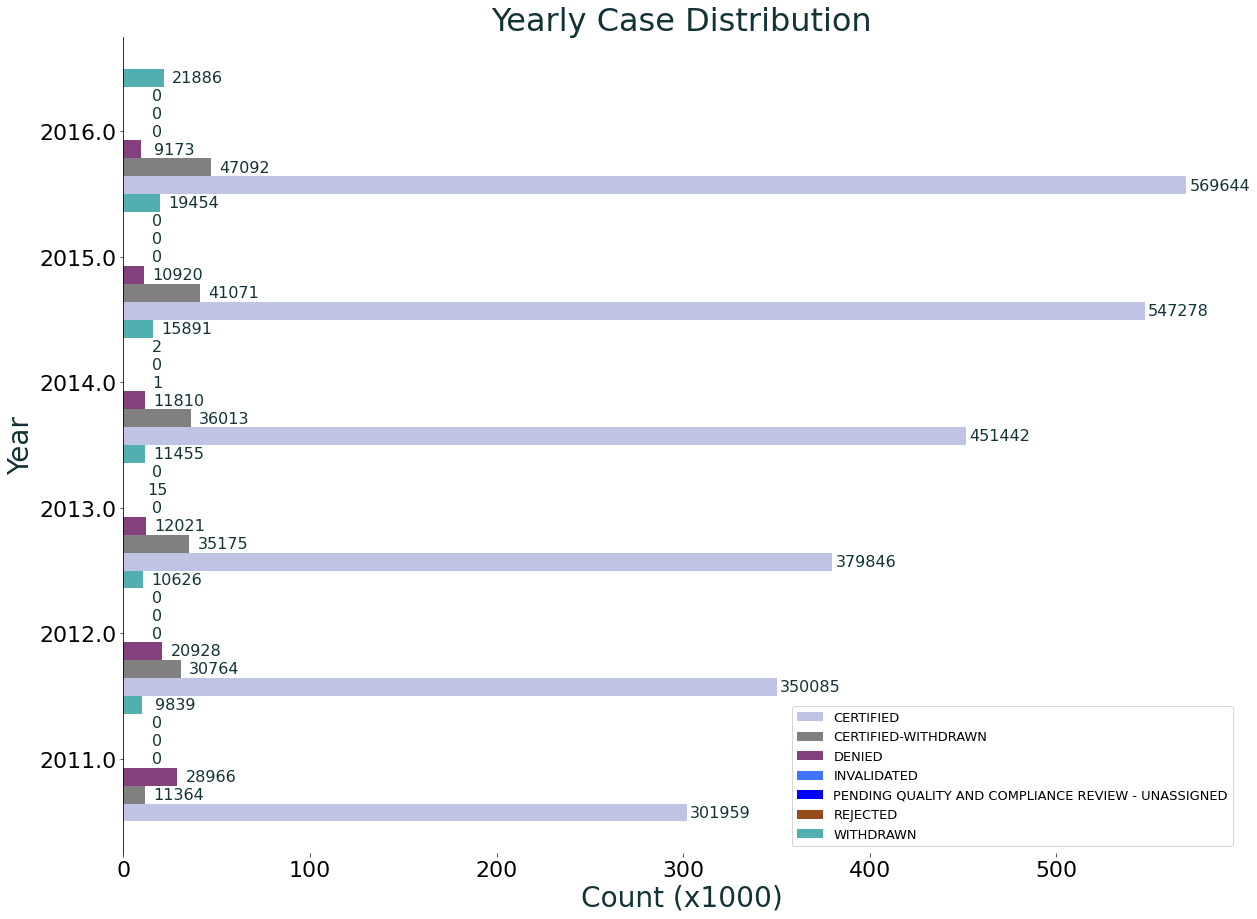

In [35]:
color_primary = "#133337"
color_list = ["#c0c4e4", "#808080", "#843F7E", "#3E74FF", "#0000ff", "#974C1B", "#51AFAF"]

fig, ax = plt.subplots(figsize=(20,15))
df.groupby(["YEAR", "CASE_STATUS"]).count()["SOC_NAME"].unstack().plot(kind="barh", width=1, ax = ax, color=color_list);

ax.set_title('Yearly Case Distribution', rotation=0, fontsize=32, color=color_primary);
ax.set_xlabel('Count (x1000)', rotation=0, fontsize=28, color=color_primary);
ax.set_ylabel('Year', rotation=90, fontsize=28, color=color_primary);
ax.tick_params(axis="both", which="major", labelsize=22, color=color_primary);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.set_major_formatter(num_formatter)
plt.legend(loc='lower right', prop={'size': 13})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width+18000, 
            y+height/2,
           '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=16,
            color=color_primary)

### Wage Distribution

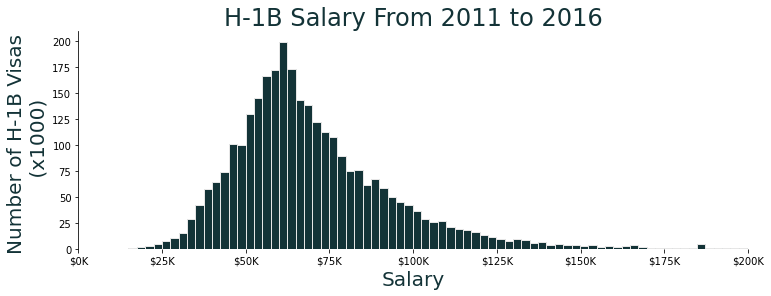

In [36]:
prevailing_wage_without_outlier = [wage for wage in df.PREVAILING_WAGE if wage < 500000]

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.hist(prevailing_wage_without_outlier,bins=200, edgecolor='#E6E6E6', color=color_primary);
plt.xlim([0, 200000])

plt.xlabel('Salary', fontsize=20, color="#133337")
plt.ylabel('Number of H-1B Visas \n (x1000)', fontsize=20, color="#133337")
ax.xaxis.set_major_formatter(USD_formatter)
ax.yaxis.set_major_formatter(num_formatter)
ax.set_title('H-1B Salary From 2011 to 2016', fontsize=24, color="#133337");
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

### Wage Distribution by year

/home/karma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


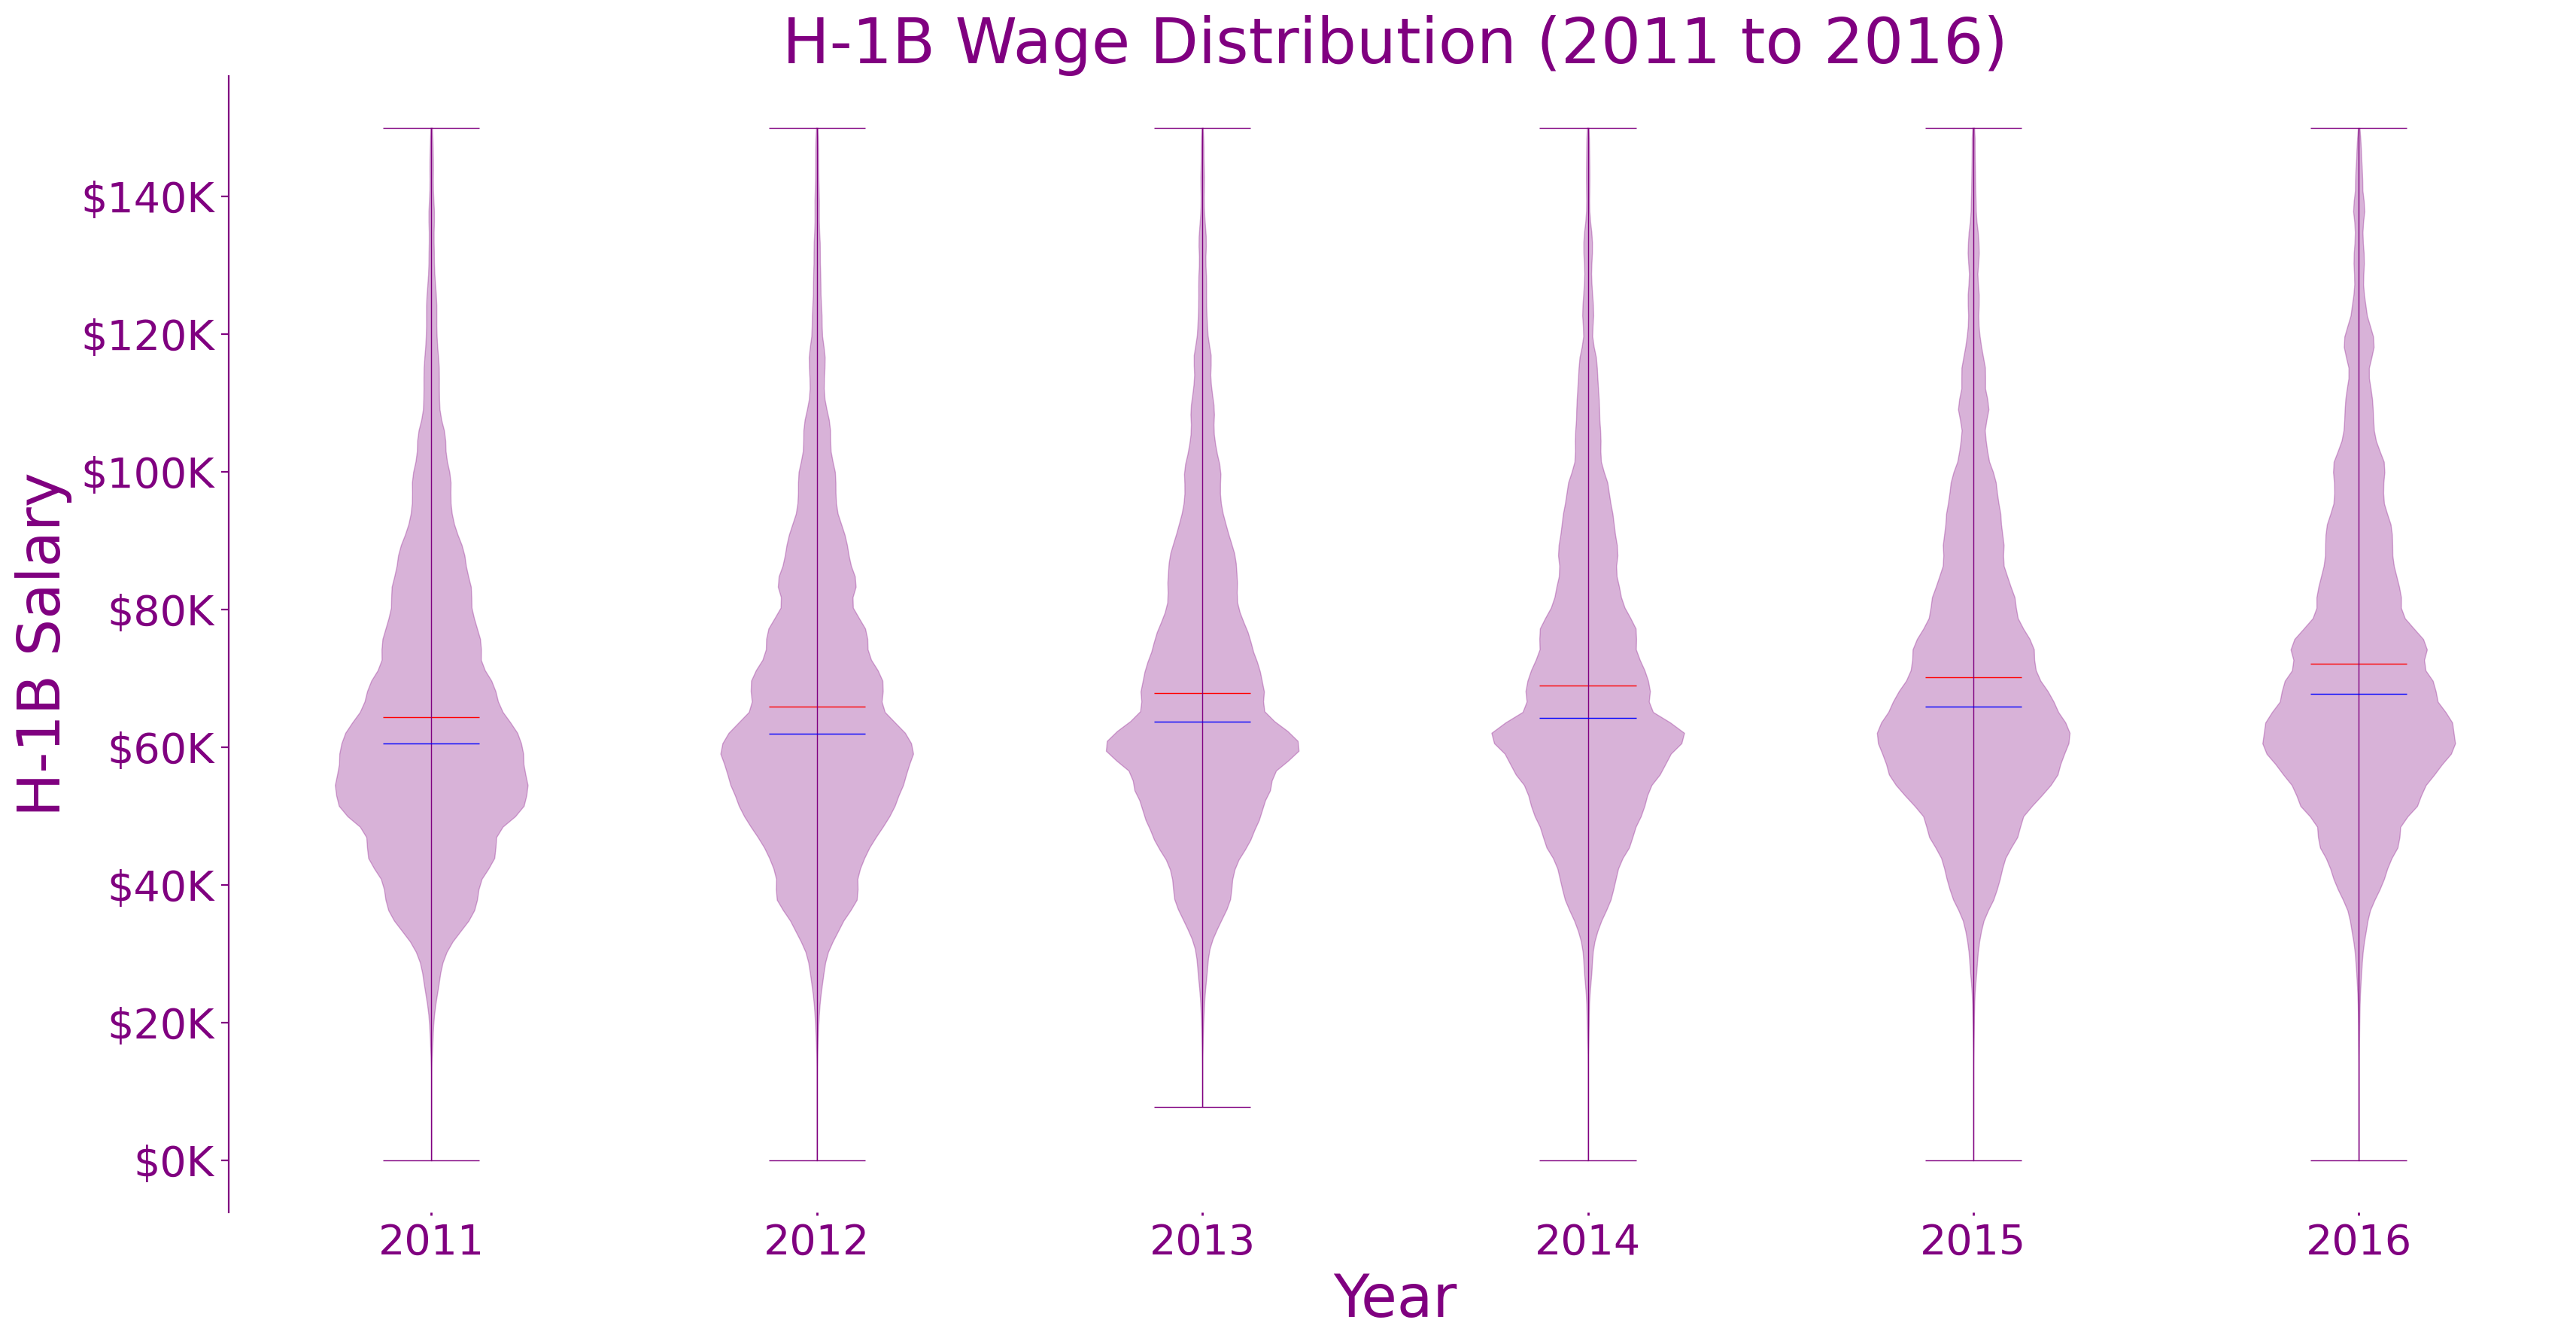

In [37]:
color_primary="purple"
fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=200)
prevailing_wage_lt_150k = df[df['PREVAILING_WAGE']<150000]
g = ax.violinplot(dataset = [prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2011]['PREVAILING_WAGE'],
                      prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2012]['PREVAILING_WAGE'],
                      prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2013]['PREVAILING_WAGE'],
                      prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2014]['PREVAILING_WAGE'],
                      prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2015]['PREVAILING_WAGE'],
                      prevailing_wage_lt_150k[prevailing_wage_lt_150k.YEAR == 2016]['PREVAILING_WAGE']],
             showmeans=True,
             showmedians=True)

# Make all the violin statistics marks red:
for item in ('cbars', 'cmins','cmaxes'):
    vp = g[item]
    vp.set_edgecolor(color_primary)
    vp.set_linewidth(0.5)

vp = g['cmeans']
vp.set_edgecolor("red")
vp.set_linewidth(0.5)

vp = g['cmedians']
vp.set_edgecolor("blue")
vp.set_linewidth(0.5)

# Make the violin body blue with a red border:
for vp in g['bodies']:
    vp.set_facecolor(color_primary)
    vp.set_edgecolor(color_primary)
    vp.set_linewidth(0.5)
    vp.set_alpha(0.3)

plt.title('H-1B Wage Distribution (2011 to 2016)', fontsize=30, color=color_primary);
plt.xlabel('Year',fontsize=28, color=color_primary);
plt.ylabel('H-1B Salary', fontsize=28, color=color_primary);
ax.yaxis.set_major_formatter(USD_formatter);

ax.set_xticklabels(range(2010,2017), fontsize=20);

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color(color_primary)

ax.tick_params(direction='out', length=1.5, width=1, axis='x', bottom=True, top=False, labelbottom=True, labeltop=False)
ax.tick_params(axis='both', which='major', labelsize=20, colors=color_primary)

###  Petition by State

In [38]:
def get_state(worksite_location):
    return worksite_location.split(",")[1].lstrip()

# get_state("SOUTH LAKE, TEXAS")

In [39]:
df["STATE"] = df["WORKSITE"].apply(lambda worksite_location: get_state(worksite_location))

In [40]:
len(df["STATE"].value_counts())

53

In [41]:
US_STATES = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO',
             'CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA',
             'HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY',
             'LOUISIANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUSETTS',
             'MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA',
             'NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK',
             'NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON',
             'PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA',
             'SOUTH DAKOTA','TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA',
             'WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']

In [42]:
state_petition_dict = {}
for state in US_STATES:
    state_petition_dict[state] = df[df["STATE"] == state]["STATE"].count()

In [43]:
state_petition_df = pd.DataFrame.from_dict(state_petition_dict, orient="index", columns=["Petition Count"])
state_petition_df.head()

Petition Count
ALABAMA              10253
ALASKA                1396
ARIZONA              42054
ARKANSAS             14762
CALIFORNIA          559941

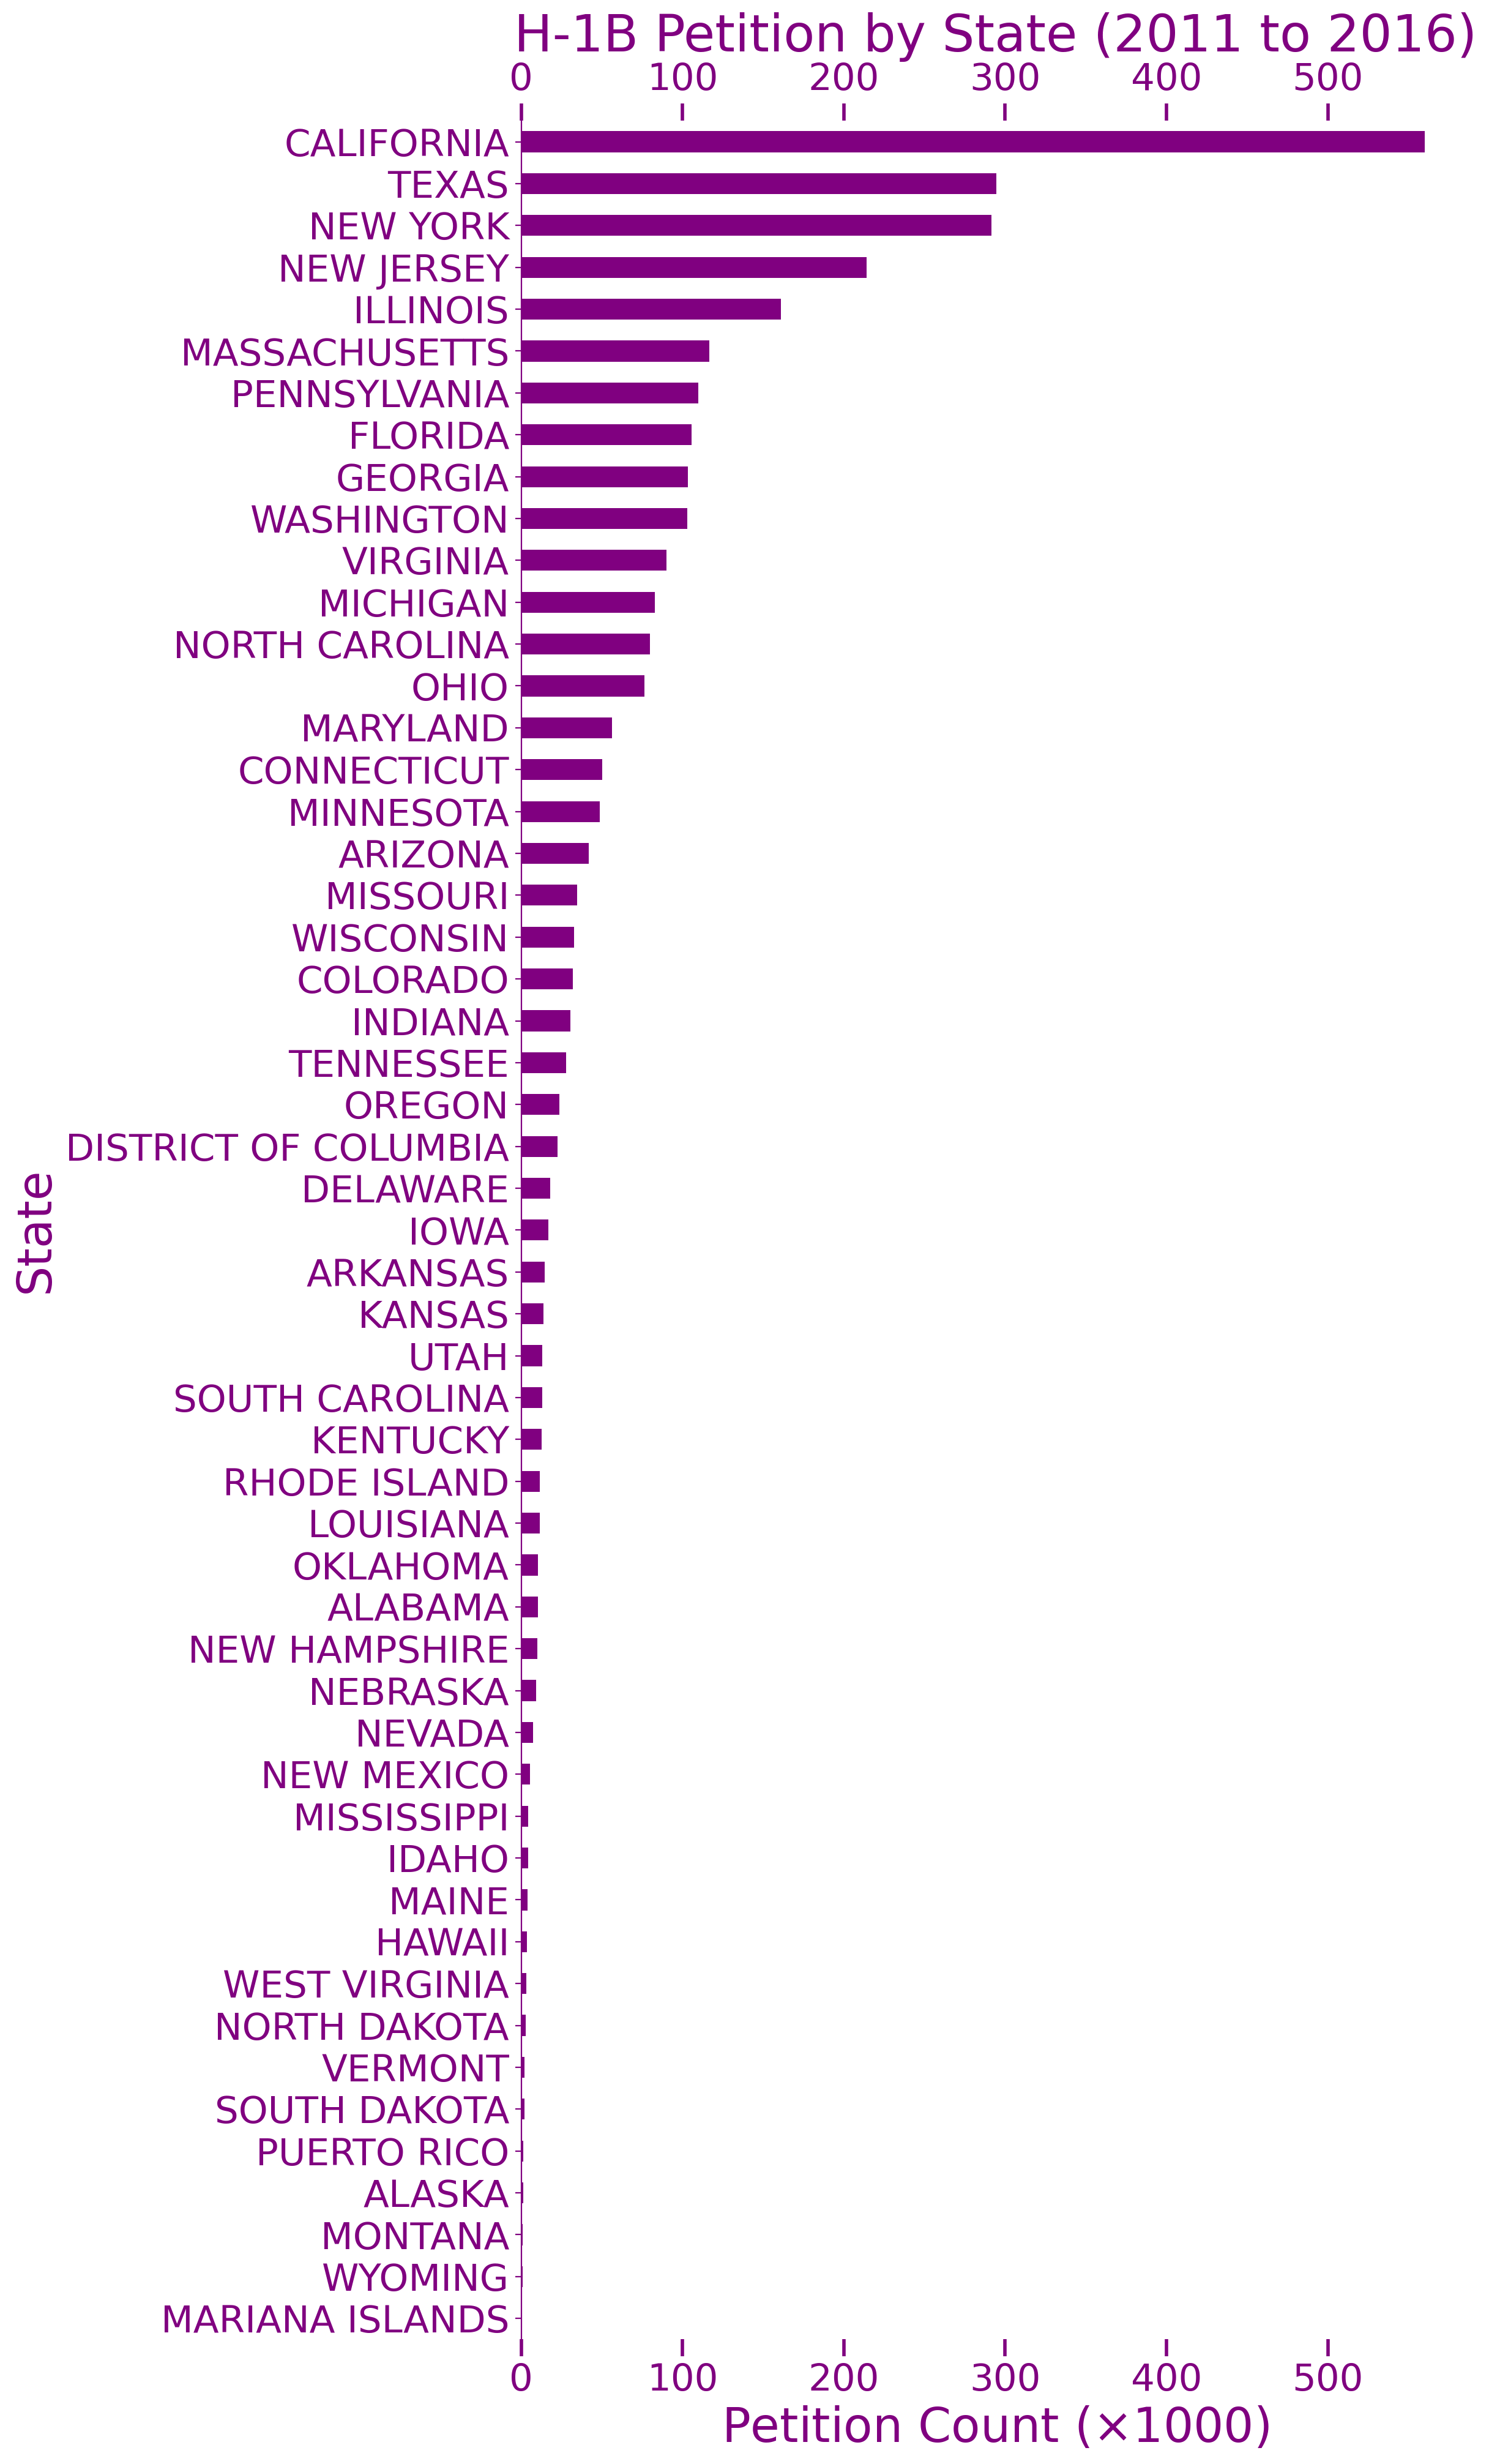

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 24), dpi=200);
state_petition_df.sort_values(by="Petition Count", ascending=True).plot(kind="barh", ax=ax, legend=False, color=color_primary);

plt.title('H-1B Petition by State (2011 to 2016)', fontsize=30, color=color_primary);
plt.xlabel(r'Petition Count ($\times$1000)',fontsize=28, color=color_primary);
plt.ylabel('State', fontsize=28, color=color_primary);
ax.xaxis.set_major_formatter(num_formatter);
ax.tick_params(axis='both', which='major', labelsize=22, colors=color_primary)

ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color(color_primary)

### Accpeted and Denied Petition

In [45]:
df["CASE_STATUS"].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94342
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [46]:
state_petition_accept_dict = {}
state_petition_denied_dict = {}
state_petition_accept_perc_dict = {} 

for state in US_STATES:
    state_petition_accept_dict[state] = df[((df["STATE"] == state) & 
                                            (df["CASE_STATUS"]=="CERTIFIED"))]["STATE"].count()    
    state_petition_denied_dict[state] = df[((df["STATE"] == state) & 
                                            ((df["CASE_STATUS"]=="DENIED") | 
                                            (df["CASE_STATUS"]=="REJECTED") | 
                                            (df["CASE_STATUS"]=="INVALIDATED")))]["STATE"].count()
    
    state_petition_accept_perc_dict[state] = round((state_petition_accept_dict[state]/state_petition_dict[state])*100, 2)

   

/home/karma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [47]:
state_petition_accept_df = pd.DataFrame.from_dict(state_petition_accept_dict, orient="index", columns=["Accepted"])
state_petition_denied_df = pd.DataFrame.from_dict(state_petition_denied_dict, orient="index", columns=["Denied"])
state_petition_df = pd.DataFrame.from_dict(state_petition_dict, orient="index", columns=["Petition Count"])

state_df = pd.concat([state_petition_accept_df, state_petition_denied_df, state_petition_df], axis=1)

In [48]:
state_df["Accepted:Denied Ratio"] = round(state_df["Accepted"]/(state_df["Denied"]+0.0001),4)

### Accepted and Petition Application by State

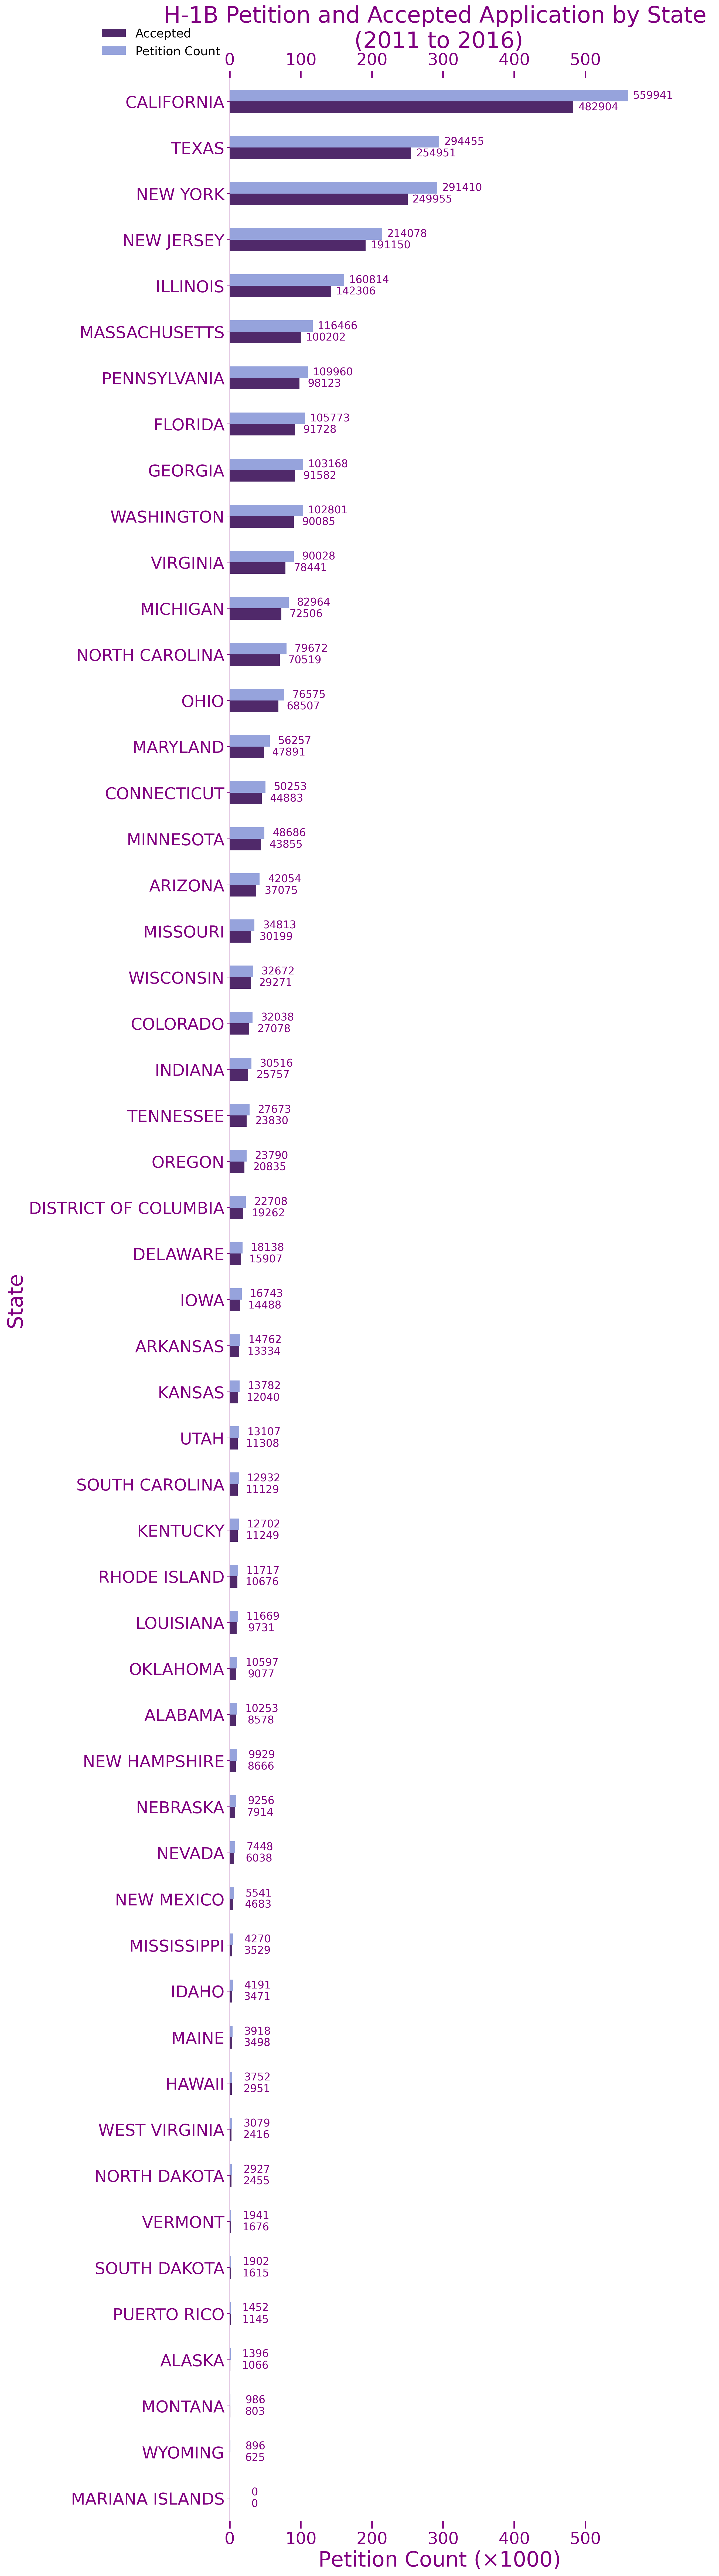

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 60), dpi=200);
state_df.sort_values(by="Petition Count", ascending=True).plot(kind="barh",
                                                               y = ["Accepted","Petition Count"],
                                                               ax = ax,
                                                               legend =True, 
                                                               color=["#50296A", "#96a3dc"]);

plt.title('H-1B Petition and Accepted Application by State \n(2011 to 2016)', fontsize=30, color=color_primary);
plt.xlabel(r'Petition Count ($\times$1000)',fontsize=28, color=color_primary);
plt.ylabel('State', fontsize=28, color=color_primary);
ax.xaxis.set_major_formatter(num_formatter);
ax.tick_params(axis='both', which='major', labelsize=22, colors=color_primary)
ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)

legend = ax.legend()
# ax.legend()
plt.setp(legend.get_texts(), color=color_primary)
ax.legend(bbox_to_anchor=(0.003, 1.025), loc="upper right", fontsize=16, edgecolor="#ffffff")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color(color_primary)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width+35000, 
            y+height/2,
           '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=14,
            color=color_primary)

### Accepted to Denied Ratio

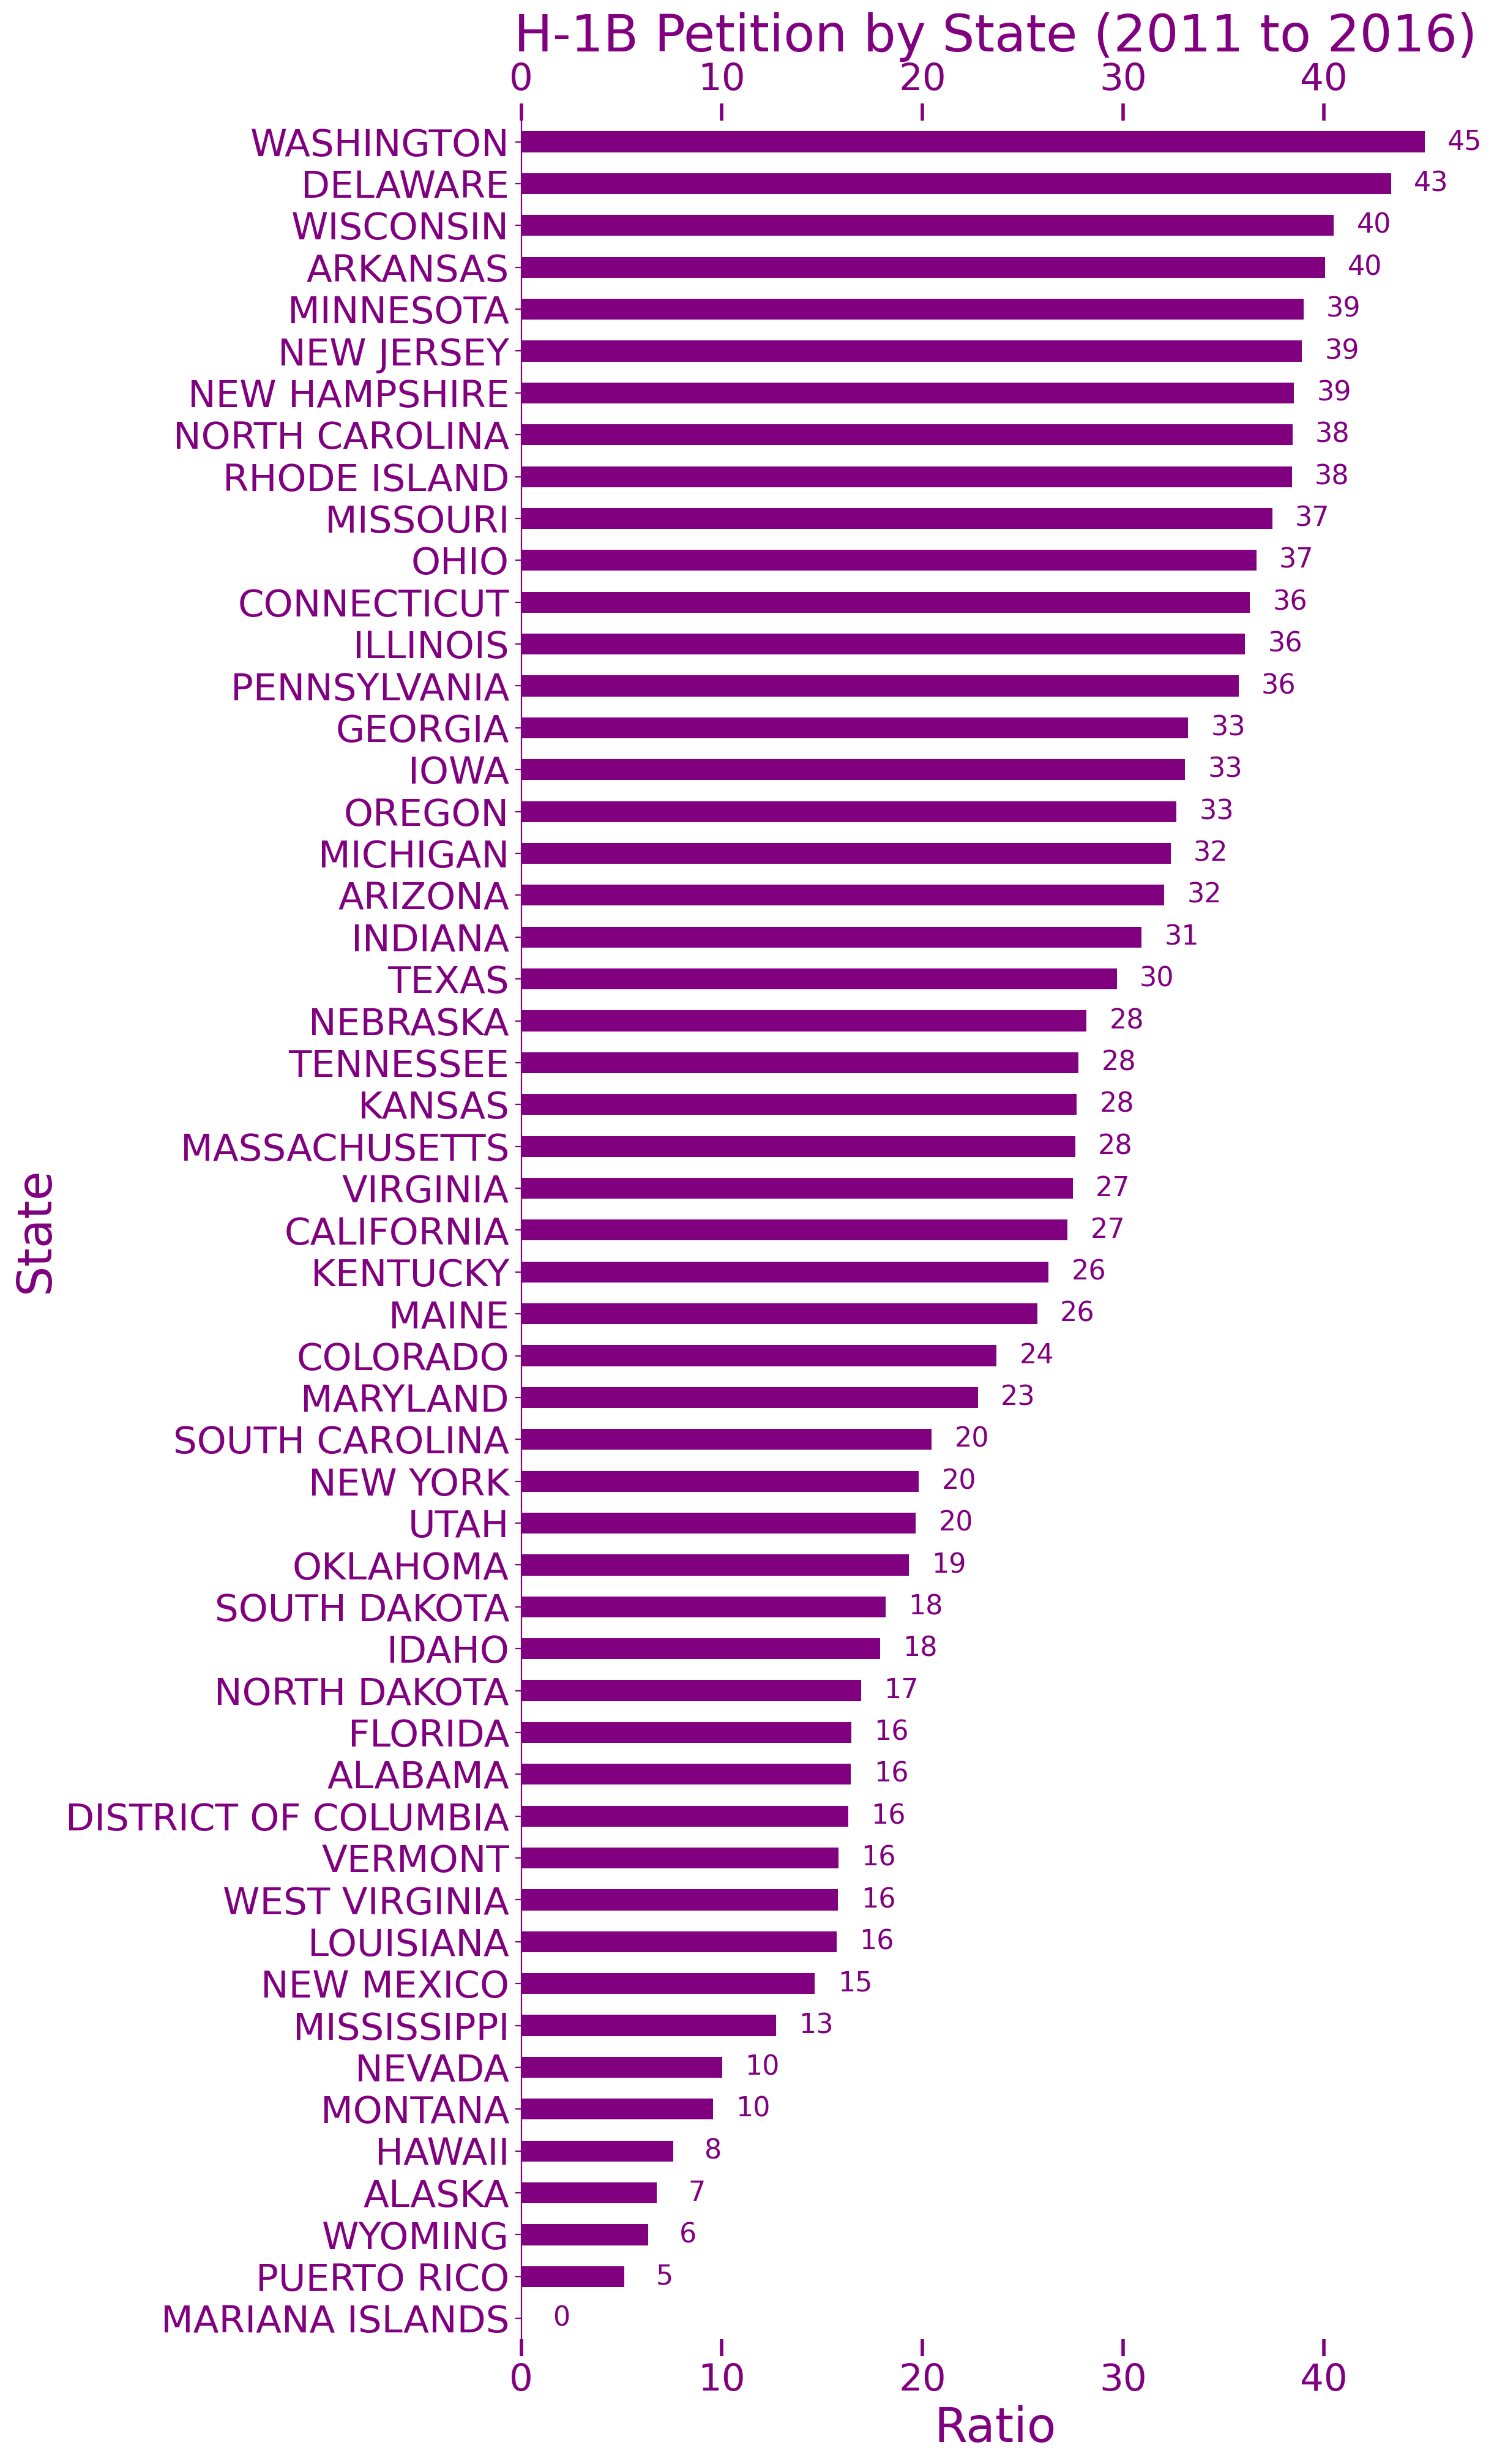

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 24), dpi=200);
state_df.sort_values(by="Accepted:Denied Ratio", ascending=True).plot(kind="barh", y=["Accepted:Denied Ratio"],ax=ax, legend=False, color=color_primary);

plt.title('H-1B Petition by State (2011 to 2016)', fontsize=30, color=color_primary);
plt.xlabel(r'Ratio',fontsize=28, color=color_primary);
plt.ylabel('State', fontsize=28, color=color_primary);
ax.tick_params(axis='both', which='major', labelsize=22, colors=color_primary)

ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color(color_primary)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width+2, 
            y+height/2,
           '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=16,
            color=color_primary)

### Top Job Titles

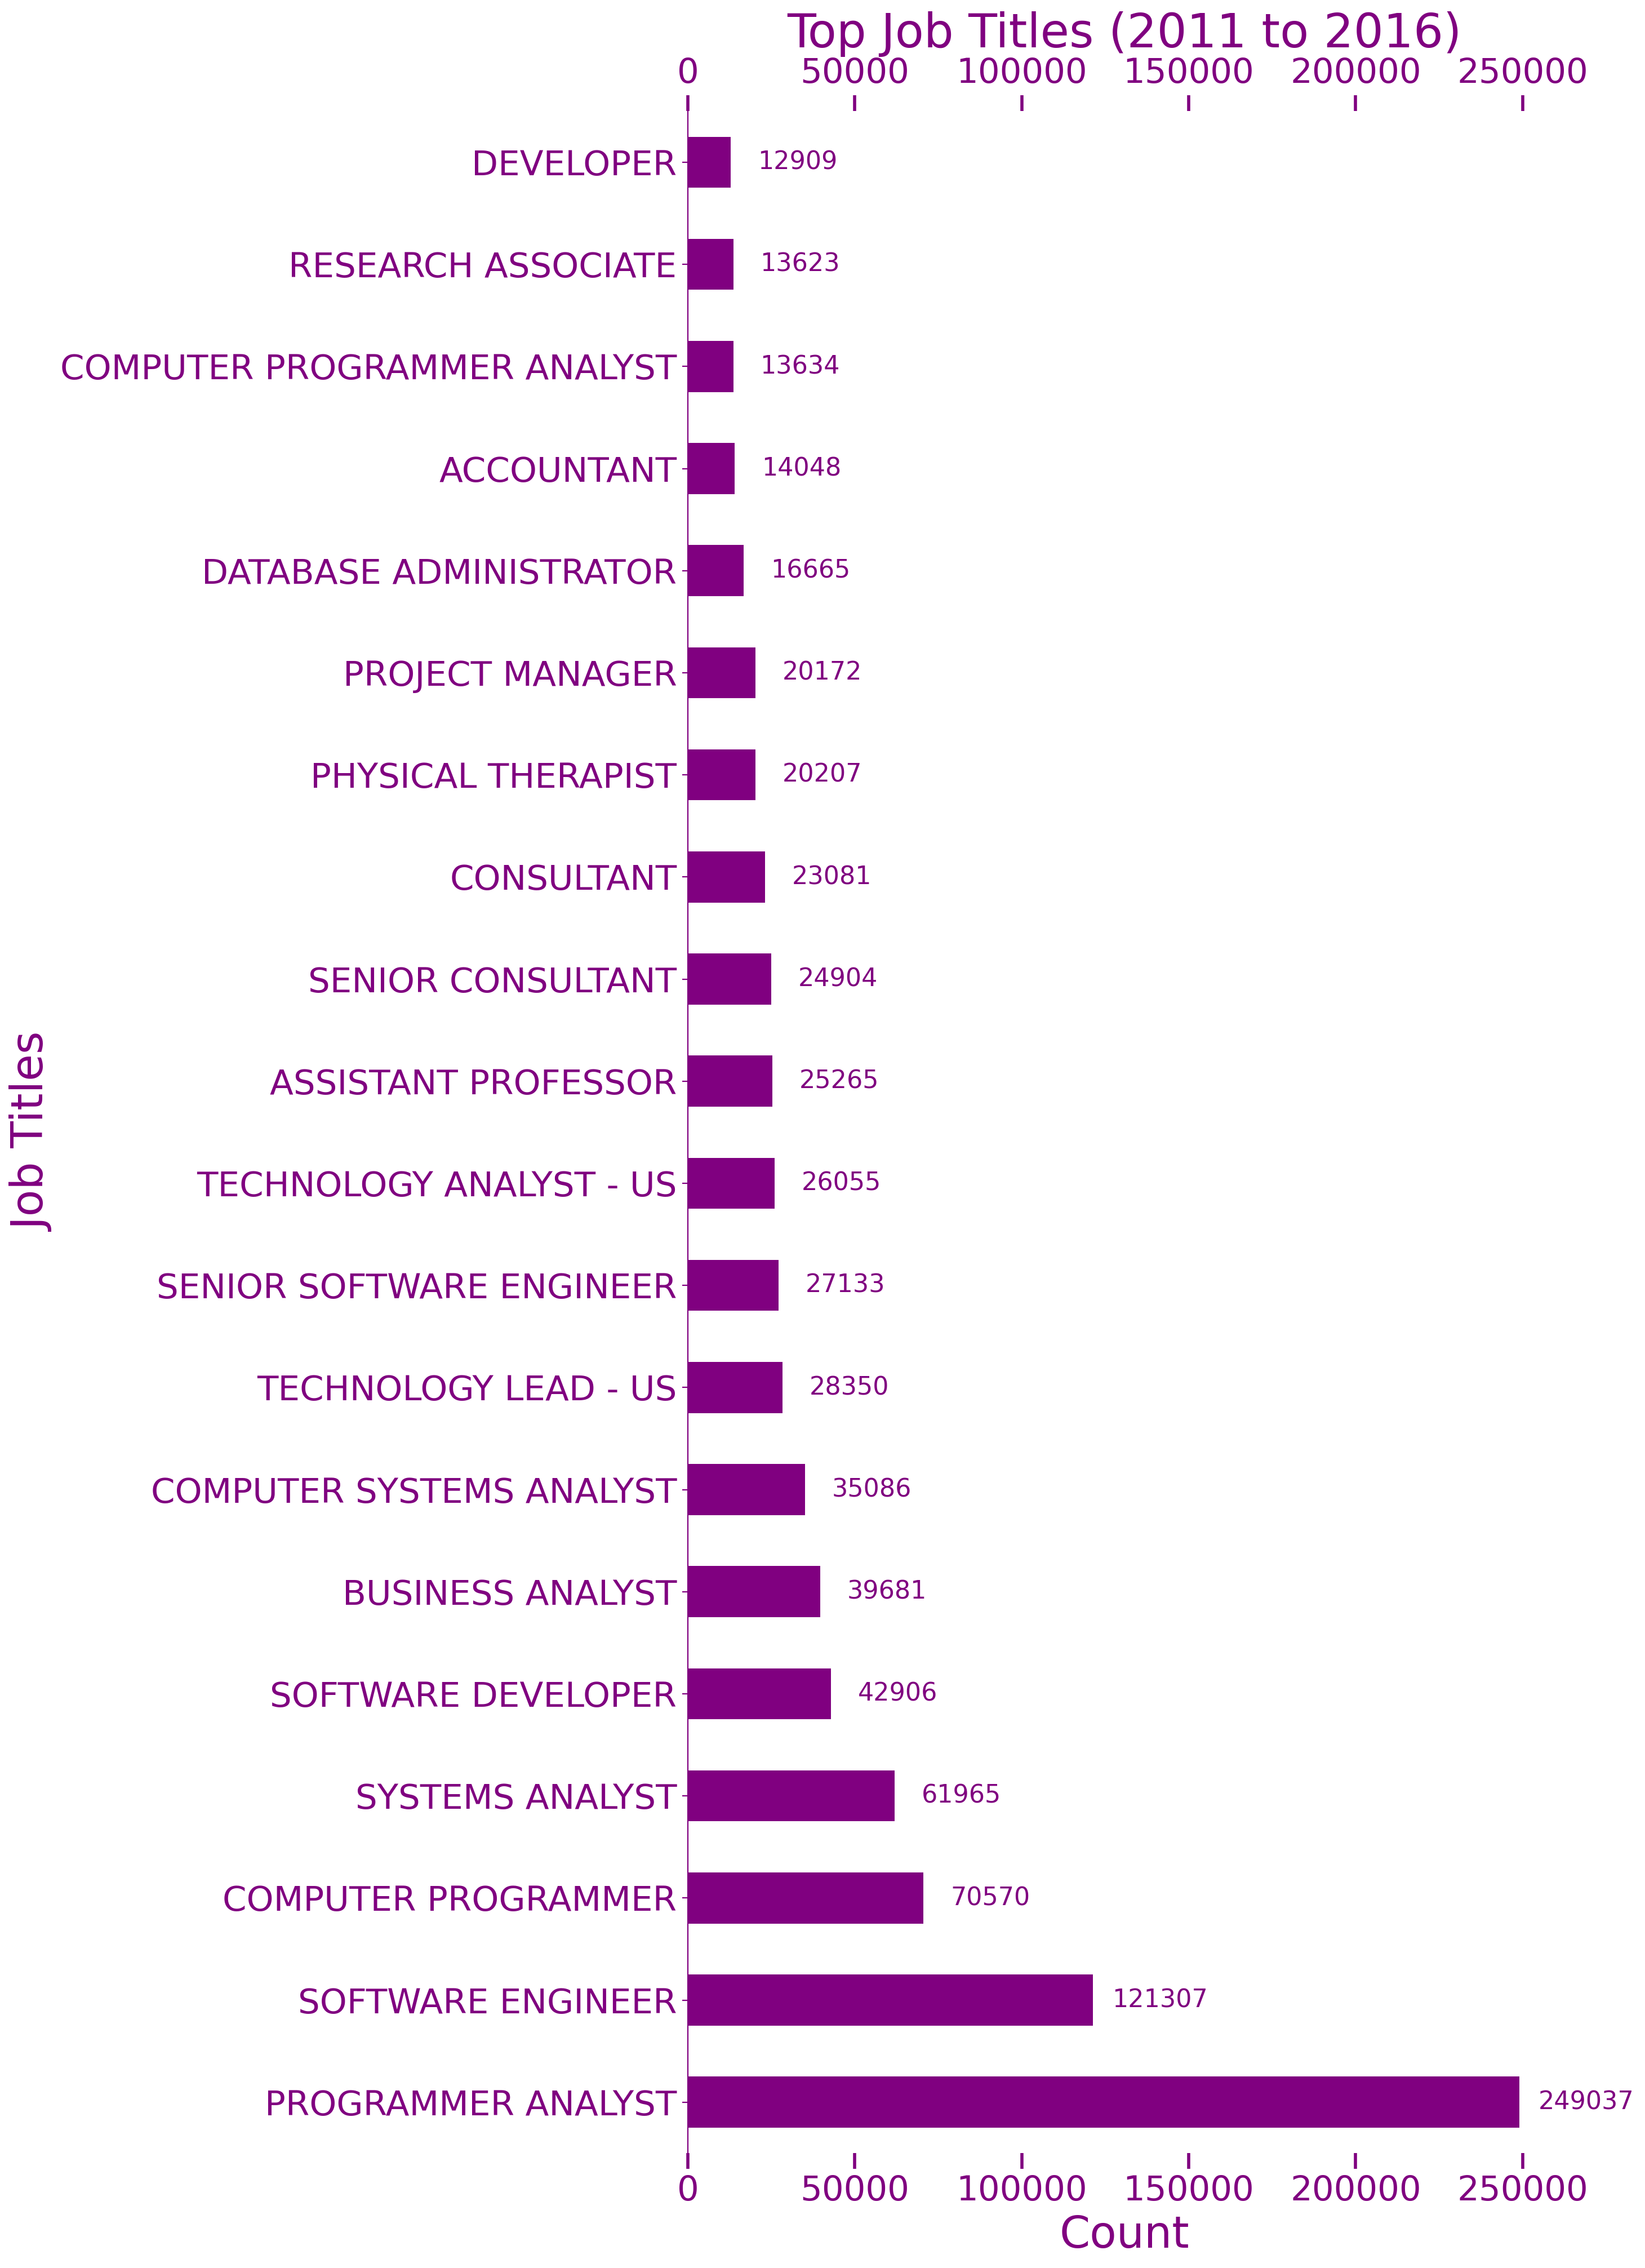

In [53]:
ig, ax = plt.subplots(1, 1, figsize=(10, 24), dpi=200);
df["JOB_TITLE"].value_counts().nlargest(20).plot(kind='barh', color=color_primary)


plt.title('Top Job Titles (2011 to 2016)', fontsize=30, color=color_primary);
plt.xlabel(r'Count',fontsize=28, color=color_primary);
plt.ylabel('Job Titles', fontsize=28, color=color_primary);
ax.tick_params(axis='both', which='major', labelsize=22, colors=color_primary)

ax.tick_params(direction='out', length=10, width=2, colors=color_primary, axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color(color_primary)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width+20000, 
            y+height/2,
           '{:.0f}'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=16,
            color=color_primary)

# TODO
* distribution by top employers
* Geographical Distribution of H-1B Top Employers